# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

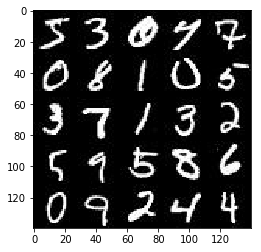

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

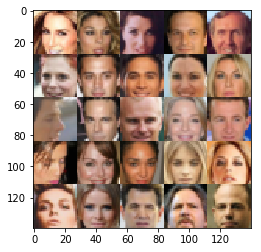

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


C:\Users\hnie\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels])
    input_z = tf.placeholder(tf.float32, [None, z_dim])
    learning_rate = tf.placeholder(tf.float32)
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [9]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        #input layer is 28*28
        x1 = tf.layers.conv2d(images, 64, 5, strides=2 ,padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu1 = tf.maximum(alpha * x1, x1)
        #now is 14*14*64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        #now is 7*7*128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        #now is 4*4*256
        
        x4 = tf.layers.conv2d(relu2, 512, 5, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu3 = tf.maximum(alpha * bn4, bn4)
        #now is 4*4*512
        
        flat = tf.reshape(relu3, [-1, 4*4*512])
        logits = tf.layers.dense(flat, 1)
        out = tf.nn.sigmoid(logits)
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        #first fully connected
        x1 = tf.layers.dense(z, 7*7*512)
        #reshape
        alpha = 0.2
        x1 = tf.reshape(x1, [-1, 7, 7, 512])
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #now is 7*7*512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #now is 14*14*256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #now is 28*28*128
        
        #output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        out = tf.nn.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [15]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [14]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, _ = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, _ = model_opt(d_loss, g_loss, learning_rate[0], beta1)
    _, g_train_opt = model_opt(d_loss, g_loss, learning_rate[1], beta1)
    
    saver = tf.train.Saver()
    
    #samples, losses = [], []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=[batch_size, z_dim])
                #Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images*2, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                
                if(steps % 10 == 0):
                    #Get and print losses
                    train_loss_d = sess.run(d_loss, feed_dict={input_real: batch_images, input_z: batch_z})
                    train_loss_g = sess.run(g_loss, feed_dict={input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator loss: {:.4f}".format(train_loss_d),
                         "Generator loss: {:.4f}".format(train_loss_g))
                    #Save losses
                    #losses.append((train_loss_d, train_loss_g))
                
                if(steps % 100 == 0):
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
            
        saver.save(sess, './checkpoints/generator.ckpt')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator loss: 1.3170 Generator loss: 0.6031
Epoch 1/2... Discriminator loss: 1.1497 Generator loss: 0.6836
Epoch 1/2... Discriminator loss: 0.7057 Generator loss: 1.2760
Epoch 1/2... Discriminator loss: 0.8047 Generator loss: 1.1393
Epoch 1/2... Discriminator loss: 1.0677 Generator loss: 1.0410
Epoch 1/2... Discriminator loss: 0.7661 Generator loss: 1.2630
Epoch 1/2... Discriminator loss: 0.6422 Generator loss: 1.1870
Epoch 1/2... Discriminator loss: 0.4742 Generator loss: 1.4101
Epoch 1/2... Discriminator loss: 0.2778 Generator loss: 1.9765
Epoch 1/2... Discriminator loss: 0.5518 Generator loss: 1.5967


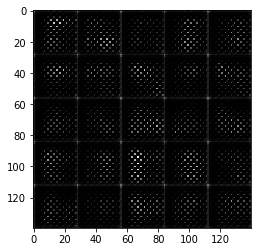

Epoch 1/2... Discriminator loss: 0.7591 Generator loss: 1.0703
Epoch 1/2... Discriminator loss: 1.2626 Generator loss: 1.0616
Epoch 1/2... Discriminator loss: 1.3524 Generator loss: 0.8237
Epoch 1/2... Discriminator loss: 1.1747 Generator loss: 0.9333
Epoch 1/2... Discriminator loss: 0.9897 Generator loss: 0.8725
Epoch 1/2... Discriminator loss: 1.4095 Generator loss: 0.6572
Epoch 1/2... Discriminator loss: 1.4753 Generator loss: 0.6427
Epoch 1/2... Discriminator loss: 1.3384 Generator loss: 0.7324
Epoch 1/2... Discriminator loss: 1.4134 Generator loss: 0.7495
Epoch 1/2... Discriminator loss: 1.4269 Generator loss: 0.7176


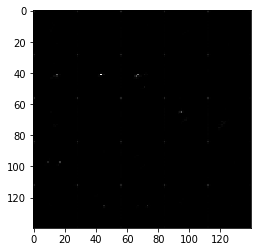

Epoch 1/2... Discriminator loss: 1.3161 Generator loss: 0.7488
Epoch 1/2... Discriminator loss: 1.3219 Generator loss: 0.7424
Epoch 1/2... Discriminator loss: 1.3848 Generator loss: 0.6292
Epoch 1/2... Discriminator loss: 1.4093 Generator loss: 0.7074
Epoch 1/2... Discriminator loss: 1.4016 Generator loss: 0.7073
Epoch 1/2... Discriminator loss: 1.4374 Generator loss: 0.7370
Epoch 1/2... Discriminator loss: 1.3313 Generator loss: 0.7312
Epoch 1/2... Discriminator loss: 1.3067 Generator loss: 0.7726
Epoch 1/2... Discriminator loss: 1.2687 Generator loss: 0.7317
Epoch 1/2... Discriminator loss: 1.4527 Generator loss: 0.7015


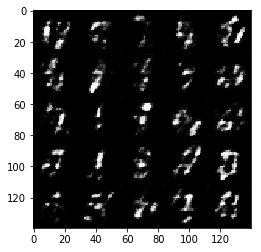

Epoch 1/2... Discriminator loss: 1.3507 Generator loss: 0.6728
Epoch 1/2... Discriminator loss: 1.3695 Generator loss: 0.8678
Epoch 1/2... Discriminator loss: 1.4234 Generator loss: 0.7091
Epoch 1/2... Discriminator loss: 1.4446 Generator loss: 0.6702
Epoch 1/2... Discriminator loss: 1.3517 Generator loss: 0.6410
Epoch 1/2... Discriminator loss: 1.4402 Generator loss: 0.7641
Epoch 1/2... Discriminator loss: 1.3749 Generator loss: 0.5867
Epoch 1/2... Discriminator loss: 1.3215 Generator loss: 0.6967
Epoch 1/2... Discriminator loss: 1.3882 Generator loss: 0.7371
Epoch 1/2... Discriminator loss: 1.3291 Generator loss: 0.7329


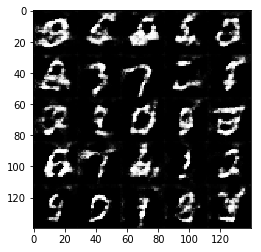

Epoch 1/2... Discriminator loss: 1.3274 Generator loss: 0.6817
Epoch 1/2... Discriminator loss: 1.3735 Generator loss: 0.9058
Epoch 1/2... Discriminator loss: 1.3963 Generator loss: 0.7647
Epoch 1/2... Discriminator loss: 1.3382 Generator loss: 0.7518
Epoch 1/2... Discriminator loss: 1.4081 Generator loss: 0.7167
Epoch 1/2... Discriminator loss: 1.5180 Generator loss: 0.7249
Epoch 1/2... Discriminator loss: 1.6228 Generator loss: 0.8372
Epoch 1/2... Discriminator loss: 1.4673 Generator loss: 0.5475
Epoch 1/2... Discriminator loss: 1.5487 Generator loss: 0.6842
Epoch 1/2... Discriminator loss: 1.5004 Generator loss: 0.8087


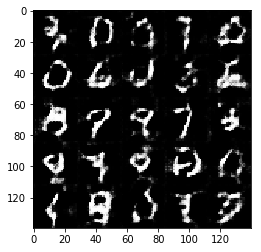

Epoch 1/2... Discriminator loss: 1.4230 Generator loss: 0.6599
Epoch 1/2... Discriminator loss: 1.5235 Generator loss: 0.8518
Epoch 1/2... Discriminator loss: 1.5761 Generator loss: 0.8484
Epoch 1/2... Discriminator loss: 1.5837 Generator loss: 0.7726
Epoch 1/2... Discriminator loss: 1.5030 Generator loss: 0.7473
Epoch 1/2... Discriminator loss: 1.5353 Generator loss: 0.7166
Epoch 1/2... Discriminator loss: 1.5479 Generator loss: 0.7802
Epoch 1/2... Discriminator loss: 1.3825 Generator loss: 0.7151
Epoch 1/2... Discriminator loss: 1.4960 Generator loss: 0.6059
Epoch 1/2... Discriminator loss: 1.6853 Generator loss: 0.3648


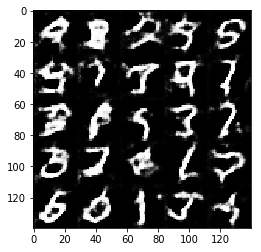

Epoch 1/2... Discriminator loss: 1.5510 Generator loss: 0.7918
Epoch 1/2... Discriminator loss: 1.6409 Generator loss: 0.7091
Epoch 1/2... Discriminator loss: 1.5970 Generator loss: 0.6920
Epoch 1/2... Discriminator loss: 1.5164 Generator loss: 0.5430
Epoch 1/2... Discriminator loss: 1.6224 Generator loss: 0.7323
Epoch 1/2... Discriminator loss: 1.5620 Generator loss: 0.6735
Epoch 1/2... Discriminator loss: 1.5001 Generator loss: 0.7406
Epoch 1/2... Discriminator loss: 1.5585 Generator loss: 0.5317
Epoch 1/2... Discriminator loss: 1.5722 Generator loss: 0.8402
Epoch 1/2... Discriminator loss: 1.5316 Generator loss: 0.6048


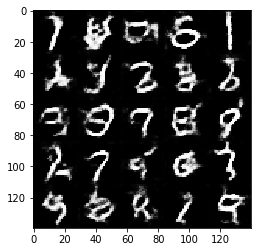

Epoch 1/2... Discriminator loss: 1.6492 Generator loss: 0.6750
Epoch 1/2... Discriminator loss: 1.6030 Generator loss: 0.8006
Epoch 1/2... Discriminator loss: 1.4752 Generator loss: 0.7885
Epoch 1/2... Discriminator loss: 1.7234 Generator loss: 0.9904
Epoch 1/2... Discriminator loss: 1.5371 Generator loss: 0.6712
Epoch 1/2... Discriminator loss: 1.5470 Generator loss: 0.8189
Epoch 1/2... Discriminator loss: 1.5314 Generator loss: 0.7017
Epoch 1/2... Discriminator loss: 1.5218 Generator loss: 0.7810
Epoch 1/2... Discriminator loss: 1.4610 Generator loss: 0.8345
Epoch 1/2... Discriminator loss: 1.6026 Generator loss: 0.8212


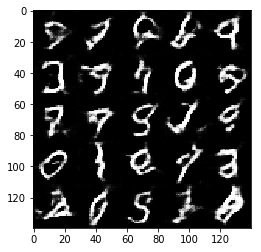

Epoch 1/2... Discriminator loss: 1.5309 Generator loss: 0.6116
Epoch 1/2... Discriminator loss: 1.3879 Generator loss: 0.7331
Epoch 1/2... Discriminator loss: 1.5207 Generator loss: 0.7603
Epoch 1/2... Discriminator loss: 1.7387 Generator loss: 0.7056
Epoch 1/2... Discriminator loss: 1.5604 Generator loss: 0.8835
Epoch 1/2... Discriminator loss: 1.5439 Generator loss: 0.7337
Epoch 1/2... Discriminator loss: 1.6923 Generator loss: 0.8998
Epoch 1/2... Discriminator loss: 1.6391 Generator loss: 0.4964
Epoch 1/2... Discriminator loss: 1.6065 Generator loss: 0.8035
Epoch 1/2... Discriminator loss: 1.5828 Generator loss: 0.6540


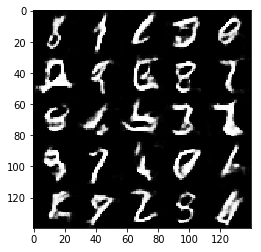

Epoch 1/2... Discriminator loss: 1.4909 Generator loss: 0.7729
Epoch 1/2... Discriminator loss: 1.6189 Generator loss: 0.7670
Epoch 1/2... Discriminator loss: 1.6188 Generator loss: 0.7584
Epoch 1/2... Discriminator loss: 1.7389 Generator loss: 0.7916
Epoch 1/2... Discriminator loss: 1.6214 Generator loss: 0.9285
Epoch 1/2... Discriminator loss: 1.7069 Generator loss: 0.8083
Epoch 1/2... Discriminator loss: 1.6049 Generator loss: 0.8075
Epoch 1/2... Discriminator loss: 1.5308 Generator loss: 0.8847
Epoch 1/2... Discriminator loss: 1.5495 Generator loss: 0.7390
Epoch 1/2... Discriminator loss: 1.5038 Generator loss: 0.7495


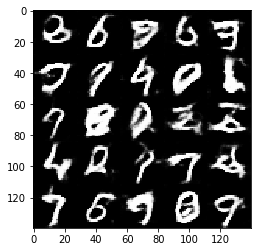

Epoch 1/2... Discriminator loss: 1.6647 Generator loss: 1.1154
Epoch 1/2... Discriminator loss: 1.6120 Generator loss: 0.9056
Epoch 1/2... Discriminator loss: 1.6164 Generator loss: 0.5359
Epoch 1/2... Discriminator loss: 1.4983 Generator loss: 0.7085
Epoch 1/2... Discriminator loss: 1.6776 Generator loss: 0.7287
Epoch 1/2... Discriminator loss: 1.6251 Generator loss: 0.6659
Epoch 1/2... Discriminator loss: 1.7422 Generator loss: 0.9591
Epoch 1/2... Discriminator loss: 1.8110 Generator loss: 1.0202
Epoch 1/2... Discriminator loss: 1.6144 Generator loss: 0.9452
Epoch 1/2... Discriminator loss: 1.4555 Generator loss: 0.7388


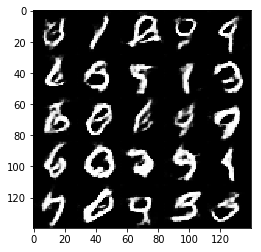

Epoch 1/2... Discriminator loss: 1.4759 Generator loss: 0.8852
Epoch 1/2... Discriminator loss: 1.6243 Generator loss: 1.0771
Epoch 1/2... Discriminator loss: 1.4742 Generator loss: 0.6773
Epoch 1/2... Discriminator loss: 1.6297 Generator loss: 0.7895
Epoch 1/2... Discriminator loss: 1.4593 Generator loss: 0.6732
Epoch 1/2... Discriminator loss: 1.5485 Generator loss: 0.5082
Epoch 1/2... Discriminator loss: 1.5856 Generator loss: 0.8883
Epoch 1/2... Discriminator loss: 1.6098 Generator loss: 0.8736
Epoch 1/2... Discriminator loss: 1.6077 Generator loss: 0.9236
Epoch 1/2... Discriminator loss: 1.5312 Generator loss: 0.8701


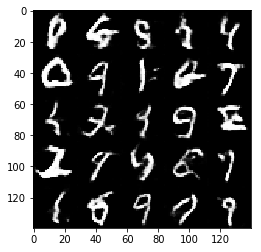

Epoch 1/2... Discriminator loss: 1.6895 Generator loss: 0.6651
Epoch 1/2... Discriminator loss: 1.6159 Generator loss: 0.6574
Epoch 1/2... Discriminator loss: 1.6733 Generator loss: 0.7191
Epoch 1/2... Discriminator loss: 1.6388 Generator loss: 1.1130
Epoch 1/2... Discriminator loss: 1.5791 Generator loss: 0.7353
Epoch 1/2... Discriminator loss: 1.5251 Generator loss: 0.6657
Epoch 1/2... Discriminator loss: 1.5182 Generator loss: 0.7134
Epoch 1/2... Discriminator loss: 1.5186 Generator loss: 0.9576
Epoch 1/2... Discriminator loss: 1.4734 Generator loss: 0.6374
Epoch 1/2... Discriminator loss: 1.4930 Generator loss: 1.0079


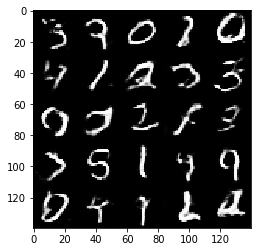

Epoch 1/2... Discriminator loss: 1.5692 Generator loss: 0.8912
Epoch 1/2... Discriminator loss: 1.5660 Generator loss: 0.7745
Epoch 1/2... Discriminator loss: 1.3583 Generator loss: 0.6494
Epoch 1/2... Discriminator loss: 1.6816 Generator loss: 0.5501
Epoch 1/2... Discriminator loss: 1.6244 Generator loss: 0.9120
Epoch 1/2... Discriminator loss: 1.7751 Generator loss: 0.7696
Epoch 1/2... Discriminator loss: 1.5161 Generator loss: 0.8778
Epoch 1/2... Discriminator loss: 1.6610 Generator loss: 0.5163
Epoch 1/2... Discriminator loss: 1.4104 Generator loss: 0.5946
Epoch 1/2... Discriminator loss: 1.6018 Generator loss: 0.6143


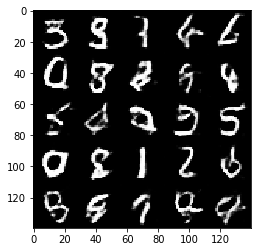

Epoch 1/2... Discriminator loss: 1.7651 Generator loss: 0.5603
Epoch 1/2... Discriminator loss: 1.8303 Generator loss: 0.8809
Epoch 1/2... Discriminator loss: 1.6815 Generator loss: 0.6689
Epoch 1/2... Discriminator loss: 1.7093 Generator loss: 0.4453
Epoch 1/2... Discriminator loss: 1.6306 Generator loss: 0.5593
Epoch 1/2... Discriminator loss: 1.6260 Generator loss: 0.4844
Epoch 1/2... Discriminator loss: 1.6948 Generator loss: 0.9174
Epoch 1/2... Discriminator loss: 1.6220 Generator loss: 0.4890
Epoch 1/2... Discriminator loss: 1.6094 Generator loss: 0.6511
Epoch 1/2... Discriminator loss: 1.7809 Generator loss: 0.8892


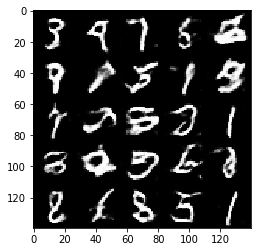

Epoch 1/2... Discriminator loss: 1.9870 Generator loss: 0.7077
Epoch 1/2... Discriminator loss: 1.7854 Generator loss: 1.3148
Epoch 1/2... Discriminator loss: 1.6508 Generator loss: 0.4806
Epoch 1/2... Discriminator loss: 1.3792 Generator loss: 0.6035
Epoch 1/2... Discriminator loss: 1.6365 Generator loss: 0.6748
Epoch 1/2... Discriminator loss: 1.7682 Generator loss: 1.3535
Epoch 1/2... Discriminator loss: 1.6107 Generator loss: 0.4848
Epoch 1/2... Discriminator loss: 1.4769 Generator loss: 0.7316
Epoch 1/2... Discriminator loss: 1.9835 Generator loss: 0.9235
Epoch 1/2... Discriminator loss: 1.6710 Generator loss: 0.7630


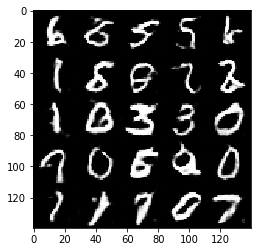

Epoch 1/2... Discriminator loss: 1.7703 Generator loss: 0.5416
Epoch 1/2... Discriminator loss: 1.3835 Generator loss: 0.8791
Epoch 1/2... Discriminator loss: 1.6711 Generator loss: 0.9649
Epoch 1/2... Discriminator loss: 1.5448 Generator loss: 0.5726
Epoch 1/2... Discriminator loss: 1.7341 Generator loss: 1.1389
Epoch 1/2... Discriminator loss: 1.5445 Generator loss: 0.4884
Epoch 1/2... Discriminator loss: 1.7339 Generator loss: 0.9944
Epoch 1/2... Discriminator loss: 2.2872 Generator loss: 1.2319
Epoch 1/2... Discriminator loss: 1.5039 Generator loss: 0.8974
Epoch 1/2... Discriminator loss: 1.6344 Generator loss: 0.6978


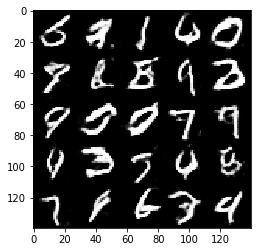

Epoch 1/2... Discriminator loss: 1.5553 Generator loss: 0.7312
Epoch 1/2... Discriminator loss: 1.8280 Generator loss: 0.4808
Epoch 1/2... Discriminator loss: 1.5551 Generator loss: 0.7207
Epoch 1/2... Discriminator loss: 1.7899 Generator loss: 1.0593
Epoch 1/2... Discriminator loss: 1.5606 Generator loss: 0.5010
Epoch 1/2... Discriminator loss: 1.6726 Generator loss: 0.4895
Epoch 1/2... Discriminator loss: 1.7043 Generator loss: 1.0650
Epoch 1/2... Discriminator loss: 1.7751 Generator loss: 1.3191
Epoch 1/2... Discriminator loss: 1.9652 Generator loss: 0.9284
Epoch 1/2... Discriminator loss: 1.8300 Generator loss: 0.7760


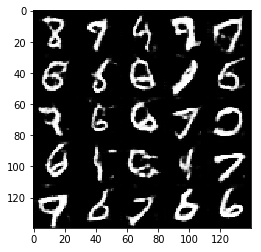

Epoch 1/2... Discriminator loss: 1.8284 Generator loss: 1.3077
Epoch 1/2... Discriminator loss: 1.9157 Generator loss: 0.7213
Epoch 1/2... Discriminator loss: 1.7619 Generator loss: 0.6653
Epoch 1/2... Discriminator loss: 1.7731 Generator loss: 0.9637
Epoch 1/2... Discriminator loss: 1.7403 Generator loss: 0.7568
Epoch 1/2... Discriminator loss: 1.7249 Generator loss: 0.9313
Epoch 1/2... Discriminator loss: 1.6451 Generator loss: 1.3776
Epoch 2/2... Discriminator loss: 1.9094 Generator loss: 0.8786
Epoch 2/2... Discriminator loss: 1.6688 Generator loss: 0.6697
Epoch 2/2... Discriminator loss: 1.5527 Generator loss: 0.7985


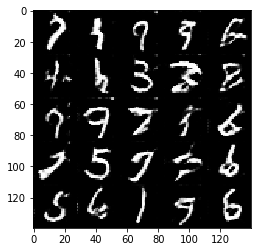

Epoch 2/2... Discriminator loss: 1.7312 Generator loss: 0.6574
Epoch 2/2... Discriminator loss: 1.5728 Generator loss: 0.7931
Epoch 2/2... Discriminator loss: 1.9337 Generator loss: 0.7631
Epoch 2/2... Discriminator loss: 1.8444 Generator loss: 0.4663
Epoch 2/2... Discriminator loss: 1.7378 Generator loss: 0.4838
Epoch 2/2... Discriminator loss: 1.8122 Generator loss: 0.6340
Epoch 2/2... Discriminator loss: 1.8594 Generator loss: 0.4552
Epoch 2/2... Discriminator loss: 1.7112 Generator loss: 0.8262
Epoch 2/2... Discriminator loss: 2.0729 Generator loss: 1.4968
Epoch 2/2... Discriminator loss: 1.6983 Generator loss: 0.9898


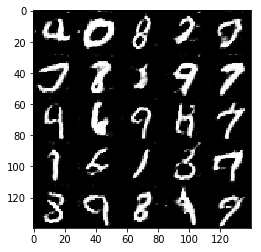

Epoch 2/2... Discriminator loss: 2.1301 Generator loss: 1.4917
Epoch 2/2... Discriminator loss: 1.6885 Generator loss: 1.4731
Epoch 2/2... Discriminator loss: 1.8286 Generator loss: 1.1972
Epoch 2/2... Discriminator loss: 1.9221 Generator loss: 0.9431
Epoch 2/2... Discriminator loss: 1.9598 Generator loss: 0.8646
Epoch 2/2... Discriminator loss: 2.0296 Generator loss: 1.2561
Epoch 2/2... Discriminator loss: 1.5916 Generator loss: 0.8264
Epoch 2/2... Discriminator loss: 1.8004 Generator loss: 0.4695
Epoch 2/2... Discriminator loss: 1.8274 Generator loss: 1.0451
Epoch 2/2... Discriminator loss: 1.7968 Generator loss: 0.4707


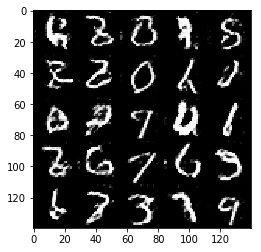

Epoch 2/2... Discriminator loss: 1.7237 Generator loss: 0.7707
Epoch 2/2... Discriminator loss: 1.9743 Generator loss: 0.9104
Epoch 2/2... Discriminator loss: 2.2006 Generator loss: 0.5675
Epoch 2/2... Discriminator loss: 2.0466 Generator loss: 0.9227
Epoch 2/2... Discriminator loss: 1.8866 Generator loss: 0.4846
Epoch 2/2... Discriminator loss: 1.9977 Generator loss: 1.1157
Epoch 2/2... Discriminator loss: 1.7726 Generator loss: 1.2950
Epoch 2/2... Discriminator loss: 1.7144 Generator loss: 0.9565
Epoch 2/2... Discriminator loss: 1.8995 Generator loss: 0.8805
Epoch 2/2... Discriminator loss: 1.9731 Generator loss: 0.6947


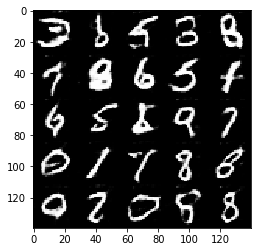

Epoch 2/2... Discriminator loss: 2.3153 Generator loss: 0.7401
Epoch 2/2... Discriminator loss: 1.7692 Generator loss: 1.1976
Epoch 2/2... Discriminator loss: 1.9415 Generator loss: 0.6533
Epoch 2/2... Discriminator loss: 1.9275 Generator loss: 0.6596
Epoch 2/2... Discriminator loss: 1.8633 Generator loss: 0.4925
Epoch 2/2... Discriminator loss: 2.0989 Generator loss: 1.0502
Epoch 2/2... Discriminator loss: 1.7760 Generator loss: 1.4888
Epoch 2/2... Discriminator loss: 1.9133 Generator loss: 0.8721
Epoch 2/2... Discriminator loss: 1.7406 Generator loss: 0.7526
Epoch 2/2... Discriminator loss: 2.1016 Generator loss: 0.7041


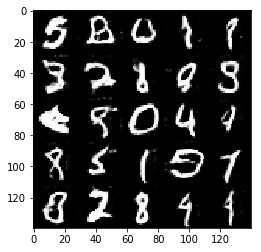

Epoch 2/2... Discriminator loss: 2.2329 Generator loss: 0.8500
Epoch 2/2... Discriminator loss: 1.7017 Generator loss: 0.8587
Epoch 2/2... Discriminator loss: 1.7139 Generator loss: 0.9634
Epoch 2/2... Discriminator loss: 2.0265 Generator loss: 1.1254
Epoch 2/2... Discriminator loss: 2.0249 Generator loss: 0.6999
Epoch 2/2... Discriminator loss: 1.6411 Generator loss: 0.8745
Epoch 2/2... Discriminator loss: 2.0183 Generator loss: 0.6098
Epoch 2/2... Discriminator loss: 2.2470 Generator loss: 0.9478
Epoch 2/2... Discriminator loss: 2.1396 Generator loss: 1.2596
Epoch 2/2... Discriminator loss: 2.2220 Generator loss: 0.8129


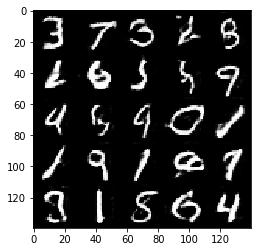

Epoch 2/2... Discriminator loss: 2.5314 Generator loss: 0.8696
Epoch 2/2... Discriminator loss: 1.6802 Generator loss: 0.6826
Epoch 2/2... Discriminator loss: 1.8887 Generator loss: 0.7461
Epoch 2/2... Discriminator loss: 1.7984 Generator loss: 0.6097
Epoch 2/2... Discriminator loss: 2.1638 Generator loss: 0.9008
Epoch 2/2... Discriminator loss: 2.0848 Generator loss: 1.1564
Epoch 2/2... Discriminator loss: 2.1275 Generator loss: 0.3523
Epoch 2/2... Discriminator loss: 1.7781 Generator loss: 0.7903
Epoch 2/2... Discriminator loss: 2.0623 Generator loss: 0.9961
Epoch 2/2... Discriminator loss: 2.4256 Generator loss: 0.5230


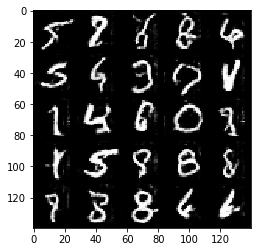

Epoch 2/2... Discriminator loss: 2.0600 Generator loss: 1.1409
Epoch 2/2... Discriminator loss: 2.1292 Generator loss: 0.9190
Epoch 2/2... Discriminator loss: 2.0302 Generator loss: 0.8058
Epoch 2/2... Discriminator loss: 2.2309 Generator loss: 0.7540
Epoch 2/2... Discriminator loss: 2.2474 Generator loss: 0.9401
Epoch 2/2... Discriminator loss: 2.0535 Generator loss: 0.9919
Epoch 2/2... Discriminator loss: 2.0700 Generator loss: 1.2028
Epoch 2/2... Discriminator loss: 1.8132 Generator loss: 1.3292
Epoch 2/2... Discriminator loss: 2.5026 Generator loss: 0.4008
Epoch 2/2... Discriminator loss: 2.6266 Generator loss: 0.6408


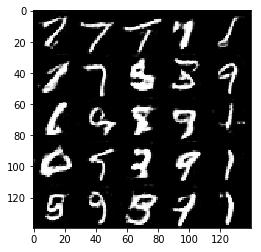

Epoch 2/2... Discriminator loss: 2.1181 Generator loss: 1.1344
Epoch 2/2... Discriminator loss: 2.2142 Generator loss: 0.9924
Epoch 2/2... Discriminator loss: 1.9862 Generator loss: 1.0017
Epoch 2/2... Discriminator loss: 2.2876 Generator loss: 0.9237
Epoch 2/2... Discriminator loss: 1.7225 Generator loss: 0.6596
Epoch 2/2... Discriminator loss: 2.1818 Generator loss: 0.6732
Epoch 2/2... Discriminator loss: 2.0787 Generator loss: 0.6075
Epoch 2/2... Discriminator loss: 2.4120 Generator loss: 0.5086
Epoch 2/2... Discriminator loss: 1.9521 Generator loss: 0.9651
Epoch 2/2... Discriminator loss: 2.2026 Generator loss: 1.1669


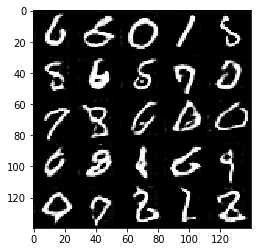

Epoch 2/2... Discriminator loss: 2.1780 Generator loss: 0.4804
Epoch 2/2... Discriminator loss: 2.3091 Generator loss: 0.9926
Epoch 2/2... Discriminator loss: 2.0557 Generator loss: 1.5341
Epoch 2/2... Discriminator loss: 2.2083 Generator loss: 0.6740
Epoch 2/2... Discriminator loss: 1.9127 Generator loss: 1.0432
Epoch 2/2... Discriminator loss: 2.1535 Generator loss: 1.0251
Epoch 2/2... Discriminator loss: 2.1829 Generator loss: 1.4621
Epoch 2/2... Discriminator loss: 2.1174 Generator loss: 0.8174
Epoch 2/2... Discriminator loss: 2.2505 Generator loss: 0.8095
Epoch 2/2... Discriminator loss: 1.9579 Generator loss: 0.9056


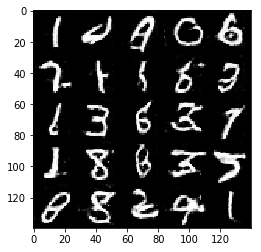

Epoch 2/2... Discriminator loss: 1.8309 Generator loss: 1.1997
Epoch 2/2... Discriminator loss: 2.3342 Generator loss: 0.6182
Epoch 2/2... Discriminator loss: 2.3806 Generator loss: 1.0061
Epoch 2/2... Discriminator loss: 2.3451 Generator loss: 0.3646
Epoch 2/2... Discriminator loss: 2.1720 Generator loss: 0.4461
Epoch 2/2... Discriminator loss: 1.8571 Generator loss: 0.8785
Epoch 2/2... Discriminator loss: 2.1252 Generator loss: 1.0293
Epoch 2/2... Discriminator loss: 2.0046 Generator loss: 0.6786
Epoch 2/2... Discriminator loss: 2.3883 Generator loss: 0.6945
Epoch 2/2... Discriminator loss: 2.4236 Generator loss: 0.6597


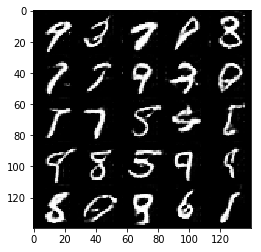

Epoch 2/2... Discriminator loss: 2.1851 Generator loss: 0.4371
Epoch 2/2... Discriminator loss: 2.2627 Generator loss: 1.1416
Epoch 2/2... Discriminator loss: 2.4033 Generator loss: 0.8082
Epoch 2/2... Discriminator loss: 2.3035 Generator loss: 0.8947
Epoch 2/2... Discriminator loss: 2.2849 Generator loss: 0.6211
Epoch 2/2... Discriminator loss: 2.5038 Generator loss: 0.8983
Epoch 2/2... Discriminator loss: 2.2179 Generator loss: 0.9228
Epoch 2/2... Discriminator loss: 1.9998 Generator loss: 1.0378
Epoch 2/2... Discriminator loss: 1.7505 Generator loss: 1.6886
Epoch 2/2... Discriminator loss: 2.0592 Generator loss: 0.6601


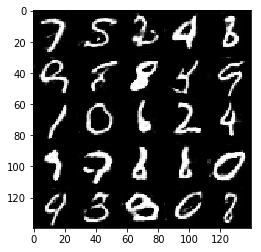

Epoch 2/2... Discriminator loss: 2.2696 Generator loss: 0.8816
Epoch 2/2... Discriminator loss: 2.3411 Generator loss: 0.5092
Epoch 2/2... Discriminator loss: 2.1867 Generator loss: 1.0240
Epoch 2/2... Discriminator loss: 2.2490 Generator loss: 1.0004
Epoch 2/2... Discriminator loss: 2.0706 Generator loss: 1.0682
Epoch 2/2... Discriminator loss: 1.9607 Generator loss: 0.7427
Epoch 2/2... Discriminator loss: 2.1454 Generator loss: 0.6112
Epoch 2/2... Discriminator loss: 1.9874 Generator loss: 0.8843
Epoch 2/2... Discriminator loss: 2.0604 Generator loss: 0.6565
Epoch 2/2... Discriminator loss: 2.6423 Generator loss: 0.3738


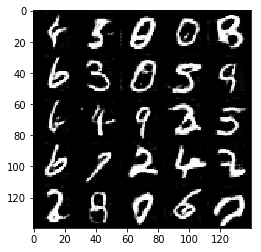

Epoch 2/2... Discriminator loss: 2.4907 Generator loss: 1.0960
Epoch 2/2... Discriminator loss: 2.1501 Generator loss: 1.0900
Epoch 2/2... Discriminator loss: 2.1018 Generator loss: 0.9846
Epoch 2/2... Discriminator loss: 2.2821 Generator loss: 1.0607
Epoch 2/2... Discriminator loss: 2.0801 Generator loss: 0.6890
Epoch 2/2... Discriminator loss: 2.1696 Generator loss: 1.3194
Epoch 2/2... Discriminator loss: 1.9975 Generator loss: 0.9843
Epoch 2/2... Discriminator loss: 2.1154 Generator loss: 1.3647
Epoch 2/2... Discriminator loss: 2.1220 Generator loss: 1.1127
Epoch 2/2... Discriminator loss: 2.3535 Generator loss: 0.7071


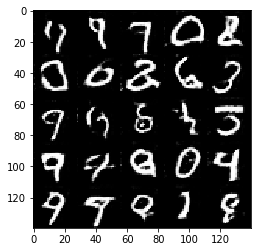

Epoch 2/2... Discriminator loss: 2.5986 Generator loss: 0.5033
Epoch 2/2... Discriminator loss: 2.5238 Generator loss: 1.0449
Epoch 2/2... Discriminator loss: 2.1740 Generator loss: 0.7802
Epoch 2/2... Discriminator loss: 2.4148 Generator loss: 1.3018
Epoch 2/2... Discriminator loss: 2.8995 Generator loss: 0.4362
Epoch 2/2... Discriminator loss: 2.4605 Generator loss: 1.0621
Epoch 2/2... Discriminator loss: 2.1216 Generator loss: 0.9163
Epoch 2/2... Discriminator loss: 1.9265 Generator loss: 1.1655
Epoch 2/2... Discriminator loss: 2.7087 Generator loss: 0.6059
Epoch 2/2... Discriminator loss: 2.3264 Generator loss: 0.8614


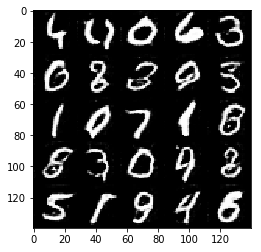

Epoch 2/2... Discriminator loss: 2.3482 Generator loss: 0.7753
Epoch 2/2... Discriminator loss: 2.2679 Generator loss: 0.7744
Epoch 2/2... Discriminator loss: 2.1740 Generator loss: 0.4846
Epoch 2/2... Discriminator loss: 2.2378 Generator loss: 1.1543
Epoch 2/2... Discriminator loss: 1.7445 Generator loss: 1.4733
Epoch 2/2... Discriminator loss: 2.0360 Generator loss: 0.8352
Epoch 2/2... Discriminator loss: 2.1734 Generator loss: 0.7799
Epoch 2/2... Discriminator loss: 2.5452 Generator loss: 0.5563
Epoch 2/2... Discriminator loss: 2.4004 Generator loss: 0.5754
Epoch 2/2... Discriminator loss: 1.7948 Generator loss: 1.4163


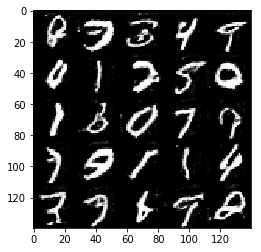

Epoch 2/2... Discriminator loss: 1.8838 Generator loss: 1.0968
Epoch 2/2... Discriminator loss: 2.0808 Generator loss: 1.2908
Epoch 2/2... Discriminator loss: 2.5715 Generator loss: 0.6528
Epoch 2/2... Discriminator loss: 2.2855 Generator loss: 1.0605
Epoch 2/2... Discriminator loss: 2.2090 Generator loss: 0.8010
Epoch 2/2... Discriminator loss: 2.6178 Generator loss: 0.9489
Epoch 2/2... Discriminator loss: 2.0209 Generator loss: 1.1343
Epoch 2/2... Discriminator loss: 2.2367 Generator loss: 1.8143
Epoch 2/2... Discriminator loss: 1.8807 Generator loss: 0.9253
Epoch 2/2... Discriminator loss: 1.9451 Generator loss: 0.8209


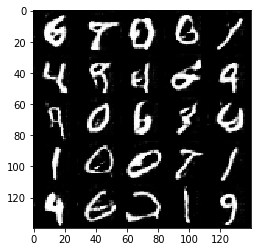

Epoch 2/2... Discriminator loss: 2.0960 Generator loss: 1.2395
Epoch 2/2... Discriminator loss: 2.1103 Generator loss: 0.7587
Epoch 2/2... Discriminator loss: 2.3397 Generator loss: 1.0722
Epoch 2/2... Discriminator loss: 2.4459 Generator loss: 0.4545
Epoch 2/2... Discriminator loss: 2.2735 Generator loss: 0.9666
Epoch 2/2... Discriminator loss: 2.4581 Generator loss: 1.0823
Epoch 2/2... Discriminator loss: 2.7026 Generator loss: 0.6632
Epoch 2/2... Discriminator loss: 2.3387 Generator loss: 1.3796
Epoch 2/2... Discriminator loss: 2.7611 Generator loss: 0.3614
Epoch 2/2... Discriminator loss: 2.4201 Generator loss: 0.4920


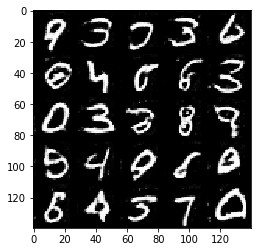

Epoch 2/2... Discriminator loss: 1.9448 Generator loss: 1.4711
Epoch 2/2... Discriminator loss: 2.0624 Generator loss: 1.0950
Epoch 2/2... Discriminator loss: 2.5173 Generator loss: 1.1894
Epoch 2/2... Discriminator loss: 2.5114 Generator loss: 0.7501
Epoch 2/2... Discriminator loss: 2.3080 Generator loss: 1.2617
Epoch 2/2... Discriminator loss: 2.5223 Generator loss: 0.8195
Epoch 2/2... Discriminator loss: 2.1880 Generator loss: 1.3558
Epoch 2/2... Discriminator loss: 3.0864 Generator loss: 0.8346
Epoch 2/2... Discriminator loss: 2.3158 Generator loss: 0.7646
Epoch 2/2... Discriminator loss: 2.4945 Generator loss: 0.4872


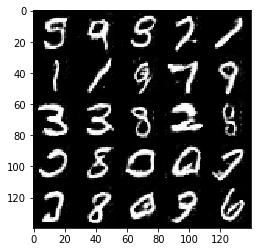

Epoch 2/2... Discriminator loss: 2.1024 Generator loss: 0.7209
Epoch 2/2... Discriminator loss: 2.4691 Generator loss: 0.6344
Epoch 2/2... Discriminator loss: 2.1297 Generator loss: 1.2104
Epoch 2/2... Discriminator loss: 2.6394 Generator loss: 1.0297
Epoch 2/2... Discriminator loss: 1.8740 Generator loss: 1.3875


In [15]:
batch_size = 64
z_dim = 100
global_step = tf.Variable(0, trainable=False)
d_learning_rate = tf.train.exponential_decay(0.0005, global_step, 100, 0.96, staircase=True)
g_learning_rate = tf.train.exponential_decay(0.002, global_step, 100, 0.96, staircase=True)
learning_rate = (d_learning_rate, g_learning_rate)
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator loss: 2.5790 Generator loss: 0.1502
Epoch 1/1... Discriminator loss: 1.9035 Generator loss: 0.2851
Epoch 1/1... Discriminator loss: 1.6155 Generator loss: 0.4008
Epoch 1/1... Discriminator loss: 1.4892 Generator loss: 0.4364
Epoch 1/1... Discriminator loss: 0.9653 Generator loss: 0.8174
Epoch 1/1... Discriminator loss: 1.0286 Generator loss: 0.9586
Epoch 1/1... Discriminator loss: 1.2497 Generator loss: 0.6300
Epoch 1/1... Discriminator loss: 1.0702 Generator loss: 0.9523
Epoch 1/1... Discriminator loss: 0.9403 Generator loss: 0.8361
Epoch 1/1... Discriminator loss: 1.0916 Generator loss: 0.7393


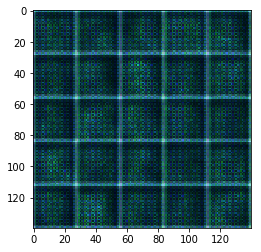

Epoch 1/1... Discriminator loss: 1.0507 Generator loss: 0.8348
Epoch 1/1... Discriminator loss: 0.9020 Generator loss: 1.0335
Epoch 1/1... Discriminator loss: 0.7731 Generator loss: 1.0454
Epoch 1/1... Discriminator loss: 0.9194 Generator loss: 0.9512
Epoch 1/1... Discriminator loss: 0.7849 Generator loss: 1.1045
Epoch 1/1... Discriminator loss: 0.6373 Generator loss: 1.0682
Epoch 1/1... Discriminator loss: 0.7853 Generator loss: 0.8685
Epoch 1/1... Discriminator loss: 0.4759 Generator loss: 1.3578
Epoch 1/1... Discriminator loss: 0.6053 Generator loss: 1.2592
Epoch 1/1... Discriminator loss: 0.3264 Generator loss: 1.7702


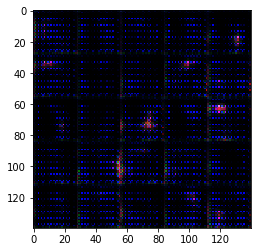

Epoch 1/1... Discriminator loss: 0.3951 Generator loss: 1.7182
Epoch 1/1... Discriminator loss: 0.2548 Generator loss: 2.0307
Epoch 1/1... Discriminator loss: 0.2100 Generator loss: 2.1587
Epoch 1/1... Discriminator loss: 0.3192 Generator loss: 1.9735
Epoch 1/1... Discriminator loss: 0.2481 Generator loss: 2.0643
Epoch 1/1... Discriminator loss: 0.2820 Generator loss: 2.0766
Epoch 1/1... Discriminator loss: 0.9379 Generator loss: 1.3742
Epoch 1/1... Discriminator loss: 0.4817 Generator loss: 1.1648
Epoch 1/1... Discriminator loss: 0.4059 Generator loss: 1.5630
Epoch 1/1... Discriminator loss: 0.4203 Generator loss: 1.4183


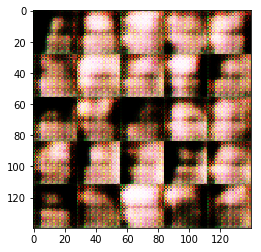

Epoch 1/1... Discriminator loss: 0.6483 Generator loss: 1.2263
Epoch 1/1... Discriminator loss: 0.7070 Generator loss: 1.4718
Epoch 1/1... Discriminator loss: 0.5365 Generator loss: 1.5733
Epoch 1/1... Discriminator loss: 1.0930 Generator loss: 0.6469
Epoch 1/1... Discriminator loss: 0.8223 Generator loss: 1.3669
Epoch 1/1... Discriminator loss: 0.6237 Generator loss: 2.3926
Epoch 1/1... Discriminator loss: 1.2346 Generator loss: 0.5639
Epoch 1/1... Discriminator loss: 1.2063 Generator loss: 0.7257
Epoch 1/1... Discriminator loss: 0.7069 Generator loss: 1.4972
Epoch 1/1... Discriminator loss: 1.0227 Generator loss: 0.7804


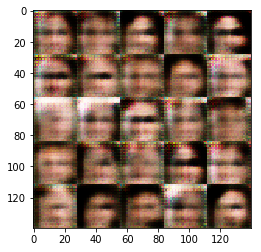

Epoch 1/1... Discriminator loss: 0.9362 Generator loss: 0.9148
Epoch 1/1... Discriminator loss: 1.3194 Generator loss: 0.4570
Epoch 1/1... Discriminator loss: 0.9286 Generator loss: 0.7619
Epoch 1/1... Discriminator loss: 0.6621 Generator loss: 1.2203
Epoch 1/1... Discriminator loss: 1.0450 Generator loss: 1.2207
Epoch 1/1... Discriminator loss: 1.1953 Generator loss: 0.5576
Epoch 1/1... Discriminator loss: 0.9602 Generator loss: 0.9329
Epoch 1/1... Discriminator loss: 1.1058 Generator loss: 0.9340
Epoch 1/1... Discriminator loss: 0.7387 Generator loss: 1.0989
Epoch 1/1... Discriminator loss: 0.9666 Generator loss: 0.6461


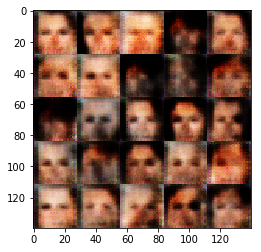

Epoch 1/1... Discriminator loss: 1.1053 Generator loss: 0.8648
Epoch 1/1... Discriminator loss: 1.1115 Generator loss: 0.9594
Epoch 1/1... Discriminator loss: 0.6723 Generator loss: 1.4502
Epoch 1/1... Discriminator loss: 1.0985 Generator loss: 0.7314
Epoch 1/1... Discriminator loss: 1.0935 Generator loss: 0.6732
Epoch 1/1... Discriminator loss: 0.9056 Generator loss: 1.1438
Epoch 1/1... Discriminator loss: 0.8881 Generator loss: 0.7869
Epoch 1/1... Discriminator loss: 1.0925 Generator loss: 0.6468
Epoch 1/1... Discriminator loss: 1.1314 Generator loss: 0.5834
Epoch 1/1... Discriminator loss: 0.8660 Generator loss: 0.8175


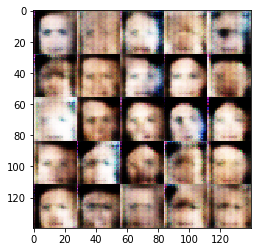

Epoch 1/1... Discriminator loss: 0.5118 Generator loss: 1.3362
Epoch 1/1... Discriminator loss: 1.0227 Generator loss: 0.6938
Epoch 1/1... Discriminator loss: 0.4278 Generator loss: 2.2585
Epoch 1/1... Discriminator loss: 0.9132 Generator loss: 1.0388
Epoch 1/1... Discriminator loss: 0.5457 Generator loss: 1.5646
Epoch 1/1... Discriminator loss: 0.6273 Generator loss: 1.5068
Epoch 1/1... Discriminator loss: 0.8297 Generator loss: 0.8093
Epoch 1/1... Discriminator loss: 0.8861 Generator loss: 0.7024
Epoch 1/1... Discriminator loss: 0.8729 Generator loss: 1.0997
Epoch 1/1... Discriminator loss: 0.7359 Generator loss: 1.2465


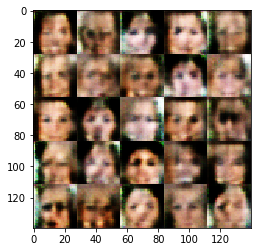

Epoch 1/1... Discriminator loss: 0.8942 Generator loss: 0.6727
Epoch 1/1... Discriminator loss: 0.8735 Generator loss: 1.0772
Epoch 1/1... Discriminator loss: 1.1447 Generator loss: 0.5728
Epoch 1/1... Discriminator loss: 0.9143 Generator loss: 0.9964
Epoch 1/1... Discriminator loss: 0.5617 Generator loss: 1.9632
Epoch 1/1... Discriminator loss: 0.8546 Generator loss: 0.8615
Epoch 1/1... Discriminator loss: 0.6220 Generator loss: 1.5957
Epoch 1/1... Discriminator loss: 0.9418 Generator loss: 0.7958
Epoch 1/1... Discriminator loss: 0.9454 Generator loss: 0.7314
Epoch 1/1... Discriminator loss: 0.9515 Generator loss: 0.7211


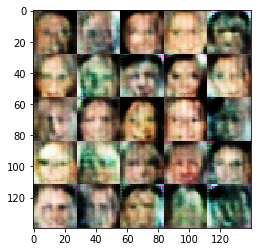

Epoch 1/1... Discriminator loss: 0.9029 Generator loss: 0.7489
Epoch 1/1... Discriminator loss: 0.7194 Generator loss: 0.8926
Epoch 1/1... Discriminator loss: 0.7041 Generator loss: 1.2143
Epoch 1/1... Discriminator loss: 0.8308 Generator loss: 0.8075
Epoch 1/1... Discriminator loss: 0.9082 Generator loss: 0.7501
Epoch 1/1... Discriminator loss: 0.6235 Generator loss: 1.3029
Epoch 1/1... Discriminator loss: 0.8425 Generator loss: 0.9611
Epoch 1/1... Discriminator loss: 0.7957 Generator loss: 0.8813
Epoch 1/1... Discriminator loss: 1.2192 Generator loss: 0.5133
Epoch 1/1... Discriminator loss: 1.1305 Generator loss: 0.5805


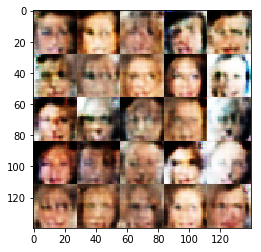

Epoch 1/1... Discriminator loss: 0.8666 Generator loss: 0.7648
Epoch 1/1... Discriminator loss: 1.0086 Generator loss: 0.6899
Epoch 1/1... Discriminator loss: 0.5430 Generator loss: 1.3835
Epoch 1/1... Discriminator loss: 0.7227 Generator loss: 1.1676
Epoch 1/1... Discriminator loss: 0.9415 Generator loss: 0.6611
Epoch 1/1... Discriminator loss: 0.7318 Generator loss: 0.9207
Epoch 1/1... Discriminator loss: 1.2224 Generator loss: 0.7971
Epoch 1/1... Discriminator loss: 0.9686 Generator loss: 0.6573
Epoch 1/1... Discriminator loss: 0.5046 Generator loss: 1.8777
Epoch 1/1... Discriminator loss: 0.7761 Generator loss: 0.8190


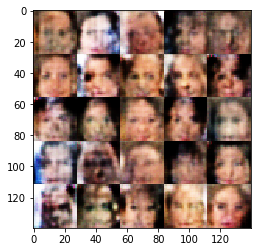

Epoch 1/1... Discriminator loss: 0.8986 Generator loss: 0.8428
Epoch 1/1... Discriminator loss: 0.7154 Generator loss: 0.8581
Epoch 1/1... Discriminator loss: 0.8874 Generator loss: 0.6971
Epoch 1/1... Discriminator loss: 0.5607 Generator loss: 1.1640
Epoch 1/1... Discriminator loss: 0.5383 Generator loss: 1.2844
Epoch 1/1... Discriminator loss: 0.6947 Generator loss: 1.0249
Epoch 1/1... Discriminator loss: 1.3191 Generator loss: 0.4191
Epoch 1/1... Discriminator loss: 0.9146 Generator loss: 0.7572
Epoch 1/1... Discriminator loss: 1.3100 Generator loss: 0.4098
Epoch 1/1... Discriminator loss: 0.8689 Generator loss: 0.9931


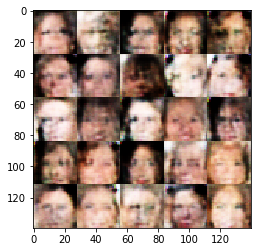

Epoch 1/1... Discriminator loss: 0.5946 Generator loss: 1.2305
Epoch 1/1... Discriminator loss: 0.5083 Generator loss: 1.6200
Epoch 1/1... Discriminator loss: 0.9747 Generator loss: 0.6229
Epoch 1/1... Discriminator loss: 0.6570 Generator loss: 0.9528
Epoch 1/1... Discriminator loss: 1.1863 Generator loss: 0.4875
Epoch 1/1... Discriminator loss: 0.6564 Generator loss: 1.0751
Epoch 1/1... Discriminator loss: 1.3190 Generator loss: 0.4264
Epoch 1/1... Discriminator loss: 1.0634 Generator loss: 0.6319
Epoch 1/1... Discriminator loss: 0.8857 Generator loss: 0.9424
Epoch 1/1... Discriminator loss: 0.3584 Generator loss: 2.0332


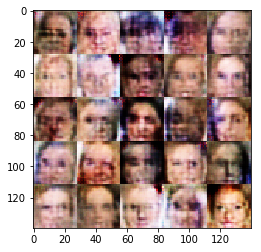

Epoch 1/1... Discriminator loss: 0.6690 Generator loss: 1.3159
Epoch 1/1... Discriminator loss: 1.0656 Generator loss: 0.5946
Epoch 1/1... Discriminator loss: 0.8245 Generator loss: 0.8506
Epoch 1/1... Discriminator loss: 0.5016 Generator loss: 1.3054
Epoch 1/1... Discriminator loss: 0.8218 Generator loss: 0.8238
Epoch 1/1... Discriminator loss: 0.9611 Generator loss: 0.8338
Epoch 1/1... Discriminator loss: 0.9836 Generator loss: 0.8141
Epoch 1/1... Discriminator loss: 0.5216 Generator loss: 1.4609
Epoch 1/1... Discriminator loss: 0.3204 Generator loss: 2.4128
Epoch 1/1... Discriminator loss: 0.5962 Generator loss: 1.5120


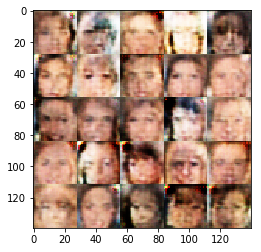

Epoch 1/1... Discriminator loss: 1.3747 Generator loss: 0.4555
Epoch 1/1... Discriminator loss: 0.4935 Generator loss: 1.5992
Epoch 1/1... Discriminator loss: 0.7044 Generator loss: 1.1702
Epoch 1/1... Discriminator loss: 0.9153 Generator loss: 0.7511
Epoch 1/1... Discriminator loss: 0.7008 Generator loss: 1.4718
Epoch 1/1... Discriminator loss: 0.9972 Generator loss: 0.6647
Epoch 1/1... Discriminator loss: 0.6190 Generator loss: 1.1052
Epoch 1/1... Discriminator loss: 0.5454 Generator loss: 1.2106
Epoch 1/1... Discriminator loss: 0.7930 Generator loss: 0.8754
Epoch 1/1... Discriminator loss: 0.7489 Generator loss: 1.1004


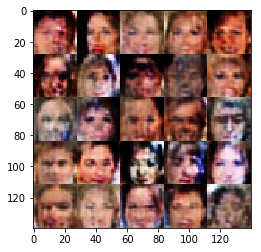

Epoch 1/1... Discriminator loss: 0.8587 Generator loss: 0.9287
Epoch 1/1... Discriminator loss: 0.8776 Generator loss: 0.6818
Epoch 1/1... Discriminator loss: 1.1758 Generator loss: 0.5894
Epoch 1/1... Discriminator loss: 0.7715 Generator loss: 0.9451
Epoch 1/1... Discriminator loss: 0.8706 Generator loss: 0.8527
Epoch 1/1... Discriminator loss: 0.9627 Generator loss: 0.6741
Epoch 1/1... Discriminator loss: 0.7810 Generator loss: 0.9615
Epoch 1/1... Discriminator loss: 1.9109 Generator loss: 0.2627
Epoch 1/1... Discriminator loss: 0.5720 Generator loss: 1.5978
Epoch 1/1... Discriminator loss: 0.8239 Generator loss: 0.9035


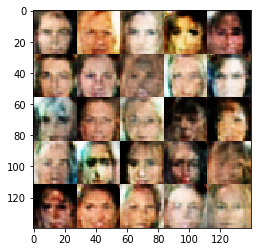

Epoch 1/1... Discriminator loss: 0.7243 Generator loss: 1.0318
Epoch 1/1... Discriminator loss: 0.6416 Generator loss: 1.0164
Epoch 1/1... Discriminator loss: 0.9789 Generator loss: 0.6965
Epoch 1/1... Discriminator loss: 1.5138 Generator loss: 0.3520
Epoch 1/1... Discriminator loss: 0.9400 Generator loss: 0.7635
Epoch 1/1... Discriminator loss: 0.7555 Generator loss: 0.9116
Epoch 1/1... Discriminator loss: 0.6746 Generator loss: 1.0888
Epoch 1/1... Discriminator loss: 1.4513 Generator loss: 0.4326
Epoch 1/1... Discriminator loss: 0.9078 Generator loss: 0.7117
Epoch 1/1... Discriminator loss: 0.5613 Generator loss: 1.3451


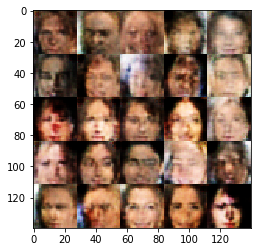

Epoch 1/1... Discriminator loss: 1.1032 Generator loss: 0.6626
Epoch 1/1... Discriminator loss: 0.7456 Generator loss: 1.0815
Epoch 1/1... Discriminator loss: 1.4282 Generator loss: 0.6852
Epoch 1/1... Discriminator loss: 0.8746 Generator loss: 0.8381
Epoch 1/1... Discriminator loss: 1.2881 Generator loss: 2.0202
Epoch 1/1... Discriminator loss: 1.0035 Generator loss: 0.7536
Epoch 1/1... Discriminator loss: 0.6932 Generator loss: 1.2131
Epoch 1/1... Discriminator loss: 0.4415 Generator loss: 1.8342
Epoch 1/1... Discriminator loss: 0.9853 Generator loss: 0.6852
Epoch 1/1... Discriminator loss: 0.6491 Generator loss: 1.2155


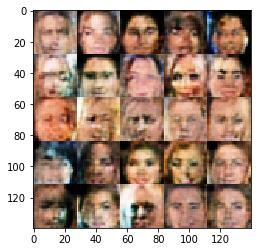

Epoch 1/1... Discriminator loss: 1.0247 Generator loss: 0.7742
Epoch 1/1... Discriminator loss: 0.7260 Generator loss: 1.3879
Epoch 1/1... Discriminator loss: 0.6909 Generator loss: 0.9894
Epoch 1/1... Discriminator loss: 0.7862 Generator loss: 0.9707
Epoch 1/1... Discriminator loss: 1.0456 Generator loss: 0.6085
Epoch 1/1... Discriminator loss: 0.6438 Generator loss: 1.1155
Epoch 1/1... Discriminator loss: 1.0180 Generator loss: 0.7458
Epoch 1/1... Discriminator loss: 0.6788 Generator loss: 1.2377
Epoch 1/1... Discriminator loss: 0.6392 Generator loss: 1.3747
Epoch 1/1... Discriminator loss: 0.7260 Generator loss: 1.1815


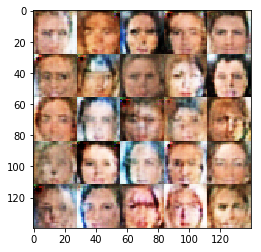

Epoch 1/1... Discriminator loss: 1.1073 Generator loss: 0.6238
Epoch 1/1... Discriminator loss: 1.0258 Generator loss: 0.7198
Epoch 1/1... Discriminator loss: 0.9866 Generator loss: 0.6548
Epoch 1/1... Discriminator loss: 0.5362 Generator loss: 1.2534
Epoch 1/1... Discriminator loss: 0.8854 Generator loss: 0.8139
Epoch 1/1... Discriminator loss: 1.1283 Generator loss: 0.5512
Epoch 1/1... Discriminator loss: 0.8574 Generator loss: 0.8835
Epoch 1/1... Discriminator loss: 0.9005 Generator loss: 0.6988
Epoch 1/1... Discriminator loss: 1.2128 Generator loss: 0.6839
Epoch 1/1... Discriminator loss: 1.0704 Generator loss: 0.7110


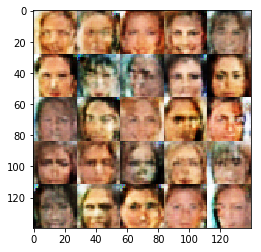

Epoch 1/1... Discriminator loss: 0.8302 Generator loss: 1.0229
Epoch 1/1... Discriminator loss: 0.7465 Generator loss: 0.8985
Epoch 1/1... Discriminator loss: 0.6937 Generator loss: 1.0816
Epoch 1/1... Discriminator loss: 0.6047 Generator loss: 1.2242
Epoch 1/1... Discriminator loss: 0.9437 Generator loss: 0.7432
Epoch 1/1... Discriminator loss: 0.5564 Generator loss: 1.2121
Epoch 1/1... Discriminator loss: 0.5850 Generator loss: 1.1097
Epoch 1/1... Discriminator loss: 1.2190 Generator loss: 0.4726
Epoch 1/1... Discriminator loss: 1.0161 Generator loss: 0.5891
Epoch 1/1... Discriminator loss: 0.6914 Generator loss: 1.1553


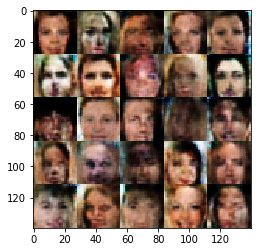

Epoch 1/1... Discriminator loss: 0.7722 Generator loss: 0.9169
Epoch 1/1... Discriminator loss: 0.7440 Generator loss: 1.1935
Epoch 1/1... Discriminator loss: 0.7765 Generator loss: 0.8746
Epoch 1/1... Discriminator loss: 1.6881 Generator loss: 0.3629
Epoch 1/1... Discriminator loss: 0.4032 Generator loss: 2.4119
Epoch 1/1... Discriminator loss: 0.9791 Generator loss: 0.7103
Epoch 1/1... Discriminator loss: 0.5961 Generator loss: 1.4276
Epoch 1/1... Discriminator loss: 0.4274 Generator loss: 2.2166
Epoch 1/1... Discriminator loss: 0.9762 Generator loss: 0.6015
Epoch 1/1... Discriminator loss: 0.3453 Generator loss: 2.0054


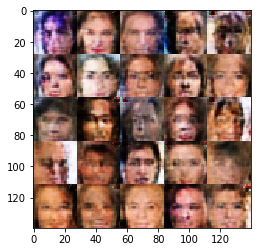

Epoch 1/1... Discriminator loss: 0.7762 Generator loss: 0.9035
Epoch 1/1... Discriminator loss: 1.1693 Generator loss: 0.5008
Epoch 1/1... Discriminator loss: 0.6639 Generator loss: 1.4506
Epoch 1/1... Discriminator loss: 0.7587 Generator loss: 0.9064
Epoch 1/1... Discriminator loss: 1.1681 Generator loss: 0.7203
Epoch 1/1... Discriminator loss: 0.8651 Generator loss: 0.7821
Epoch 1/1... Discriminator loss: 0.8507 Generator loss: 0.7704
Epoch 1/1... Discriminator loss: 1.2422 Generator loss: 0.6332
Epoch 1/1... Discriminator loss: 0.6835 Generator loss: 0.9688
Epoch 1/1... Discriminator loss: 1.1496 Generator loss: 0.6402


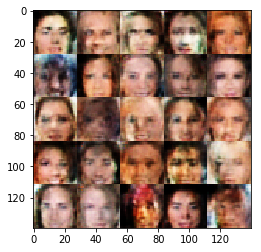

Epoch 1/1... Discriminator loss: 0.7878 Generator loss: 0.8068
Epoch 1/1... Discriminator loss: 1.0155 Generator loss: 0.9002
Epoch 1/1... Discriminator loss: 1.5501 Generator loss: 0.3937
Epoch 1/1... Discriminator loss: 0.9320 Generator loss: 0.8866
Epoch 1/1... Discriminator loss: 1.0146 Generator loss: 0.7378
Epoch 1/1... Discriminator loss: 0.8923 Generator loss: 0.8620
Epoch 1/1... Discriminator loss: 1.3783 Generator loss: 0.4499
Epoch 1/1... Discriminator loss: 0.9881 Generator loss: 0.7266
Epoch 1/1... Discriminator loss: 0.5270 Generator loss: 2.1269
Epoch 1/1... Discriminator loss: 1.1616 Generator loss: 0.5575


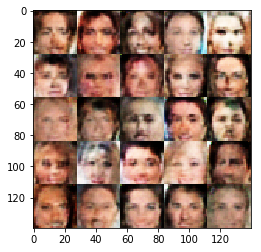

Epoch 1/1... Discriminator loss: 1.2079 Generator loss: 0.6544
Epoch 1/1... Discriminator loss: 0.7717 Generator loss: 1.0541
Epoch 1/1... Discriminator loss: 0.6230 Generator loss: 1.3589
Epoch 1/1... Discriminator loss: 0.8005 Generator loss: 1.0640
Epoch 1/1... Discriminator loss: 0.9512 Generator loss: 0.7800
Epoch 1/1... Discriminator loss: 0.9757 Generator loss: 0.6073
Epoch 1/1... Discriminator loss: 1.3910 Generator loss: 0.4590
Epoch 1/1... Discriminator loss: 0.6702 Generator loss: 1.9358
Epoch 1/1... Discriminator loss: 0.6612 Generator loss: 1.1263
Epoch 1/1... Discriminator loss: 1.2785 Generator loss: 0.5021


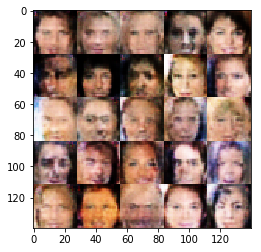

Epoch 1/1... Discriminator loss: 0.8224 Generator loss: 0.8306
Epoch 1/1... Discriminator loss: 0.6594 Generator loss: 1.0543
Epoch 1/1... Discriminator loss: 0.9969 Generator loss: 0.8001
Epoch 1/1... Discriminator loss: 1.1580 Generator loss: 0.6826
Epoch 1/1... Discriminator loss: 0.6500 Generator loss: 1.1254
Epoch 1/1... Discriminator loss: 0.7240 Generator loss: 0.9973
Epoch 1/1... Discriminator loss: 0.9053 Generator loss: 0.7057
Epoch 1/1... Discriminator loss: 1.0058 Generator loss: 0.8987
Epoch 1/1... Discriminator loss: 0.3909 Generator loss: 2.6357
Epoch 1/1... Discriminator loss: 1.0810 Generator loss: 1.4343


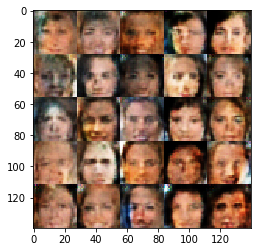

Epoch 1/1... Discriminator loss: 1.0691 Generator loss: 0.7176
Epoch 1/1... Discriminator loss: 0.9759 Generator loss: 0.7083
Epoch 1/1... Discriminator loss: 0.6706 Generator loss: 1.3504
Epoch 1/1... Discriminator loss: 1.2863 Generator loss: 0.5168
Epoch 1/1... Discriminator loss: 1.6021 Generator loss: 0.2960
Epoch 1/1... Discriminator loss: 0.9910 Generator loss: 0.9943
Epoch 1/1... Discriminator loss: 1.0206 Generator loss: 0.7218
Epoch 1/1... Discriminator loss: 0.8912 Generator loss: 0.7770
Epoch 1/1... Discriminator loss: 0.3984 Generator loss: 2.6567
Epoch 1/1... Discriminator loss: 0.9620 Generator loss: 0.8978


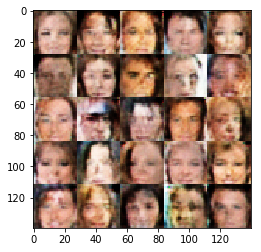

Epoch 1/1... Discriminator loss: 0.5323 Generator loss: 1.3002
Epoch 1/1... Discriminator loss: 1.2518 Generator loss: 0.5389
Epoch 1/1... Discriminator loss: 0.4524 Generator loss: 1.7190
Epoch 1/1... Discriminator loss: 1.0038 Generator loss: 0.8384
Epoch 1/1... Discriminator loss: 0.9502 Generator loss: 0.8468
Epoch 1/1... Discriminator loss: 0.9149 Generator loss: 0.8206
Epoch 1/1... Discriminator loss: 0.9015 Generator loss: 0.7563
Epoch 1/1... Discriminator loss: 0.9700 Generator loss: 0.7260
Epoch 1/1... Discriminator loss: 0.9930 Generator loss: 0.7276
Epoch 1/1... Discriminator loss: 1.1411 Generator loss: 0.6303


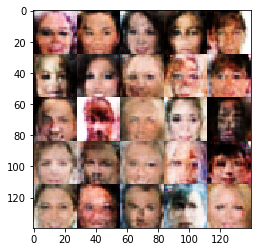

Epoch 1/1... Discriminator loss: 1.3218 Generator loss: 0.5563
Epoch 1/1... Discriminator loss: 0.9668 Generator loss: 0.7995
Epoch 1/1... Discriminator loss: 0.8738 Generator loss: 0.8397
Epoch 1/1... Discriminator loss: 0.7773 Generator loss: 1.0189
Epoch 1/1... Discriminator loss: 0.8748 Generator loss: 0.7554
Epoch 1/1... Discriminator loss: 1.0800 Generator loss: 0.7252
Epoch 1/1... Discriminator loss: 1.3934 Generator loss: 0.4874
Epoch 1/1... Discriminator loss: 0.8795 Generator loss: 1.0315
Epoch 1/1... Discriminator loss: 0.9010 Generator loss: 0.8196
Epoch 1/1... Discriminator loss: 1.1118 Generator loss: 1.1735


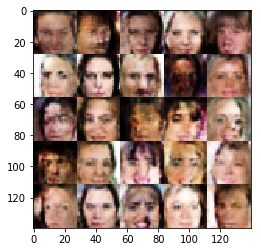

Epoch 1/1... Discriminator loss: 0.4475 Generator loss: 1.8910
Epoch 1/1... Discriminator loss: 0.8993 Generator loss: 0.7590
Epoch 1/1... Discriminator loss: 0.8962 Generator loss: 0.6900
Epoch 1/1... Discriminator loss: 0.9673 Generator loss: 0.6539
Epoch 1/1... Discriminator loss: 0.8578 Generator loss: 0.7639
Epoch 1/1... Discriminator loss: 0.9475 Generator loss: 0.6622
Epoch 1/1... Discriminator loss: 0.7016 Generator loss: 0.9135
Epoch 1/1... Discriminator loss: 1.2226 Generator loss: 0.5146
Epoch 1/1... Discriminator loss: 0.5008 Generator loss: 1.5390
Epoch 1/1... Discriminator loss: 0.7692 Generator loss: 0.8317


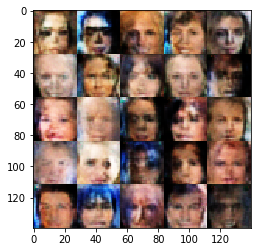

Epoch 1/1... Discriminator loss: 0.7884 Generator loss: 0.8910
Epoch 1/1... Discriminator loss: 0.8918 Generator loss: 0.7103
Epoch 1/1... Discriminator loss: 1.4124 Generator loss: 0.3794
Epoch 1/1... Discriminator loss: 0.6145 Generator loss: 1.1587
Epoch 1/1... Discriminator loss: 0.6482 Generator loss: 1.9577
Epoch 1/1... Discriminator loss: 1.3974 Generator loss: 0.4807
Epoch 1/1... Discriminator loss: 0.8701 Generator loss: 1.0324
Epoch 1/1... Discriminator loss: 0.6790 Generator loss: 1.0581
Epoch 1/1... Discriminator loss: 1.3732 Generator loss: 0.4880
Epoch 1/1... Discriminator loss: 1.3352 Generator loss: 0.8131


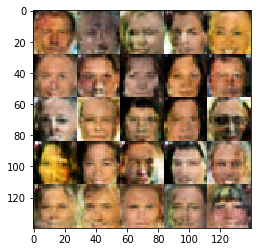

Epoch 1/1... Discriminator loss: 0.7420 Generator loss: 1.1455
Epoch 1/1... Discriminator loss: 0.9915 Generator loss: 0.7692
Epoch 1/1... Discriminator loss: 1.1132 Generator loss: 0.5583
Epoch 1/1... Discriminator loss: 0.8410 Generator loss: 0.9164
Epoch 1/1... Discriminator loss: 2.1862 Generator loss: 0.5109
Epoch 1/1... Discriminator loss: 0.9941 Generator loss: 0.6999
Epoch 1/1... Discriminator loss: 1.1338 Generator loss: 0.7305
Epoch 1/1... Discriminator loss: 1.0952 Generator loss: 0.7145
Epoch 1/1... Discriminator loss: 0.7542 Generator loss: 1.2144
Epoch 1/1... Discriminator loss: 0.9282 Generator loss: 1.0273


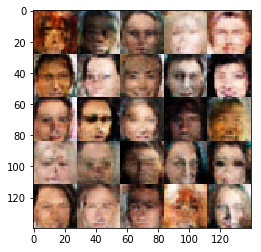

Epoch 1/1... Discriminator loss: 0.7114 Generator loss: 1.0678
Epoch 1/1... Discriminator loss: 0.8833 Generator loss: 0.7708
Epoch 1/1... Discriminator loss: 0.5278 Generator loss: 2.1572
Epoch 1/1... Discriminator loss: 0.5513 Generator loss: 1.7473
Epoch 1/1... Discriminator loss: 1.0081 Generator loss: 0.8496
Epoch 1/1... Discriminator loss: 1.3283 Generator loss: 0.4689
Epoch 1/1... Discriminator loss: 1.6226 Generator loss: 0.3600
Epoch 1/1... Discriminator loss: 1.4084 Generator loss: 0.5535
Epoch 1/1... Discriminator loss: 1.2101 Generator loss: 0.5897
Epoch 1/1... Discriminator loss: 0.7390 Generator loss: 0.9111


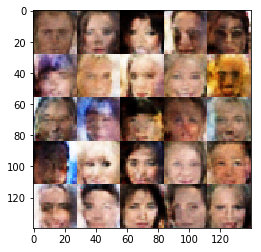

Epoch 1/1... Discriminator loss: 0.9255 Generator loss: 0.8424
Epoch 1/1... Discriminator loss: 1.1643 Generator loss: 0.7463
Epoch 1/1... Discriminator loss: 1.1170 Generator loss: 0.5832
Epoch 1/1... Discriminator loss: 1.2273 Generator loss: 0.5491
Epoch 1/1... Discriminator loss: 1.2795 Generator loss: 0.6547
Epoch 1/1... Discriminator loss: 1.5295 Generator loss: 0.5812
Epoch 1/1... Discriminator loss: 1.1821 Generator loss: 0.7127
Epoch 1/1... Discriminator loss: 1.0443 Generator loss: 0.8180
Epoch 1/1... Discriminator loss: 1.1515 Generator loss: 0.6374
Epoch 1/1... Discriminator loss: 0.9696 Generator loss: 0.6808


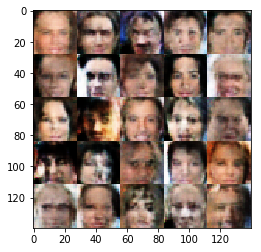

Epoch 1/1... Discriminator loss: 1.0935 Generator loss: 1.2780
Epoch 1/1... Discriminator loss: 0.9567 Generator loss: 0.6897
Epoch 1/1... Discriminator loss: 0.8613 Generator loss: 1.0625
Epoch 1/1... Discriminator loss: 0.9460 Generator loss: 1.4983
Epoch 1/1... Discriminator loss: 0.8778 Generator loss: 0.9218
Epoch 1/1... Discriminator loss: 1.4899 Generator loss: 0.6381
Epoch 1/1... Discriminator loss: 0.6409 Generator loss: 1.1757
Epoch 1/1... Discriminator loss: 0.6300 Generator loss: 1.2988
Epoch 1/1... Discriminator loss: 1.1469 Generator loss: 0.7642
Epoch 1/1... Discriminator loss: 1.2539 Generator loss: 0.6330


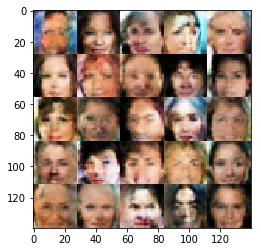

Epoch 1/1... Discriminator loss: 0.8470 Generator loss: 1.1221
Epoch 1/1... Discriminator loss: 0.8806 Generator loss: 1.1376
Epoch 1/1... Discriminator loss: 0.8311 Generator loss: 0.9004
Epoch 1/1... Discriminator loss: 1.0062 Generator loss: 0.8463
Epoch 1/1... Discriminator loss: 1.0777 Generator loss: 0.7865
Epoch 1/1... Discriminator loss: 0.9426 Generator loss: 0.9416
Epoch 1/1... Discriminator loss: 1.4627 Generator loss: 0.5062
Epoch 1/1... Discriminator loss: 0.9388 Generator loss: 1.0893
Epoch 1/1... Discriminator loss: 0.8707 Generator loss: 0.8969
Epoch 1/1... Discriminator loss: 1.3020 Generator loss: 0.5684


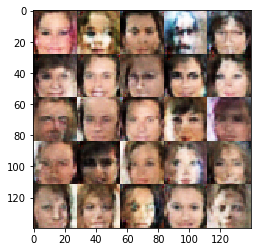

Epoch 1/1... Discriminator loss: 0.9709 Generator loss: 0.7623
Epoch 1/1... Discriminator loss: 1.0438 Generator loss: 0.8401
Epoch 1/1... Discriminator loss: 0.9929 Generator loss: 0.9404
Epoch 1/1... Discriminator loss: 0.7414 Generator loss: 1.2200
Epoch 1/1... Discriminator loss: 0.9246 Generator loss: 0.8688
Epoch 1/1... Discriminator loss: 0.8640 Generator loss: 1.0567
Epoch 1/1... Discriminator loss: 1.3784 Generator loss: 0.5210
Epoch 1/1... Discriminator loss: 1.5857 Generator loss: 0.5299
Epoch 1/1... Discriminator loss: 1.1241 Generator loss: 0.7868
Epoch 1/1... Discriminator loss: 0.9928 Generator loss: 0.7597


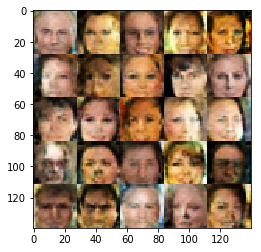

Epoch 1/1... Discriminator loss: 0.8393 Generator loss: 1.1308
Epoch 1/1... Discriminator loss: 0.9654 Generator loss: 1.2621
Epoch 1/1... Discriminator loss: 1.0534 Generator loss: 0.6861
Epoch 1/1... Discriminator loss: 0.8523 Generator loss: 1.2546
Epoch 1/1... Discriminator loss: 0.6635 Generator loss: 1.0882
Epoch 1/1... Discriminator loss: 0.9862 Generator loss: 0.8434
Epoch 1/1... Discriminator loss: 1.1413 Generator loss: 0.6006
Epoch 1/1... Discriminator loss: 0.8217 Generator loss: 0.9855
Epoch 1/1... Discriminator loss: 1.0919 Generator loss: 1.0899
Epoch 1/1... Discriminator loss: 0.7777 Generator loss: 1.2238


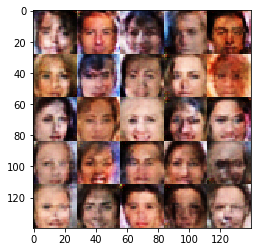

Epoch 1/1... Discriminator loss: 0.8269 Generator loss: 1.2758
Epoch 1/1... Discriminator loss: 1.0478 Generator loss: 0.8879
Epoch 1/1... Discriminator loss: 0.8065 Generator loss: 1.0361
Epoch 1/1... Discriminator loss: 1.2933 Generator loss: 0.5256
Epoch 1/1... Discriminator loss: 1.1673 Generator loss: 0.8473
Epoch 1/1... Discriminator loss: 1.2472 Generator loss: 0.6903
Epoch 1/1... Discriminator loss: 1.2547 Generator loss: 0.8519
Epoch 1/1... Discriminator loss: 0.8090 Generator loss: 0.9501
Epoch 1/1... Discriminator loss: 1.0937 Generator loss: 0.7441
Epoch 1/1... Discriminator loss: 1.7270 Generator loss: 0.5392


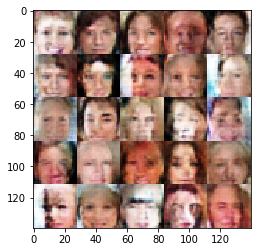

Epoch 1/1... Discriminator loss: 1.5611 Generator loss: 0.4887
Epoch 1/1... Discriminator loss: 1.6643 Generator loss: 0.3978
Epoch 1/1... Discriminator loss: 0.9337 Generator loss: 0.6768
Epoch 1/1... Discriminator loss: 0.9647 Generator loss: 0.7731
Epoch 1/1... Discriminator loss: 1.0239 Generator loss: 0.8118
Epoch 1/1... Discriminator loss: 1.1490 Generator loss: 0.6943
Epoch 1/1... Discriminator loss: 0.6873 Generator loss: 1.3858
Epoch 1/1... Discriminator loss: 0.9445 Generator loss: 0.7199
Epoch 1/1... Discriminator loss: 1.0154 Generator loss: 0.8104
Epoch 1/1... Discriminator loss: 1.1700 Generator loss: 0.7353


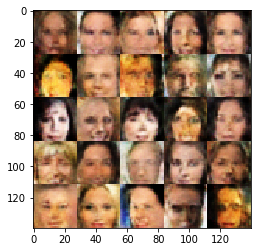

Epoch 1/1... Discriminator loss: 1.0652 Generator loss: 0.7416
Epoch 1/1... Discriminator loss: 0.9949 Generator loss: 0.7995
Epoch 1/1... Discriminator loss: 1.1551 Generator loss: 0.7064
Epoch 1/1... Discriminator loss: 1.1448 Generator loss: 0.8792
Epoch 1/1... Discriminator loss: 0.8099 Generator loss: 1.2185
Epoch 1/1... Discriminator loss: 1.2972 Generator loss: 0.6323
Epoch 1/1... Discriminator loss: 1.1430 Generator loss: 0.6467
Epoch 1/1... Discriminator loss: 1.4932 Generator loss: 0.4495
Epoch 1/1... Discriminator loss: 1.0318 Generator loss: 0.9412
Epoch 1/1... Discriminator loss: 1.5617 Generator loss: 0.5987


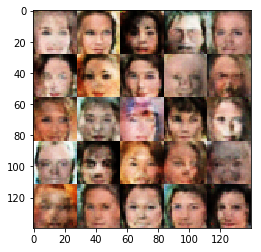

Epoch 1/1... Discriminator loss: 1.1067 Generator loss: 0.8188
Epoch 1/1... Discriminator loss: 1.2576 Generator loss: 0.5771
Epoch 1/1... Discriminator loss: 1.1023 Generator loss: 0.8172
Epoch 1/1... Discriminator loss: 1.4356 Generator loss: 0.5568
Epoch 1/1... Discriminator loss: 0.9946 Generator loss: 0.8546
Epoch 1/1... Discriminator loss: 1.3844 Generator loss: 0.5184
Epoch 1/1... Discriminator loss: 1.2775 Generator loss: 0.7582
Epoch 1/1... Discriminator loss: 1.5584 Generator loss: 0.4227
Epoch 1/1... Discriminator loss: 1.0944 Generator loss: 0.7226
Epoch 1/1... Discriminator loss: 1.1149 Generator loss: 0.8870


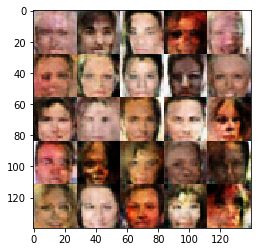

Epoch 1/1... Discriminator loss: 0.8594 Generator loss: 0.9637
Epoch 1/1... Discriminator loss: 0.5321 Generator loss: 3.1118
Epoch 1/1... Discriminator loss: 0.9221 Generator loss: 0.9849
Epoch 1/1... Discriminator loss: 1.0579 Generator loss: 0.8281
Epoch 1/1... Discriminator loss: 1.2394 Generator loss: 0.7577
Epoch 1/1... Discriminator loss: 0.6865 Generator loss: 1.9231
Epoch 1/1... Discriminator loss: 1.1782 Generator loss: 0.5879
Epoch 1/1... Discriminator loss: 0.8063 Generator loss: 1.0303
Epoch 1/1... Discriminator loss: 1.2379 Generator loss: 0.7465
Epoch 1/1... Discriminator loss: 0.8794 Generator loss: 1.1121


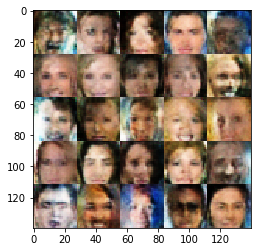

Epoch 1/1... Discriminator loss: 1.4841 Generator loss: 0.6114
Epoch 1/1... Discriminator loss: 1.2243 Generator loss: 0.7744
Epoch 1/1... Discriminator loss: 0.9842 Generator loss: 1.0225
Epoch 1/1... Discriminator loss: 1.2137 Generator loss: 0.6236
Epoch 1/1... Discriminator loss: 1.3304 Generator loss: 0.5334
Epoch 1/1... Discriminator loss: 1.0215 Generator loss: 1.0375
Epoch 1/1... Discriminator loss: 0.8972 Generator loss: 0.9929
Epoch 1/1... Discriminator loss: 1.1510 Generator loss: 0.7720
Epoch 1/1... Discriminator loss: 1.0421 Generator loss: 0.8241
Epoch 1/1... Discriminator loss: 1.1840 Generator loss: 0.8579


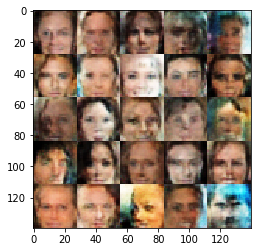

Epoch 1/1... Discriminator loss: 1.4489 Generator loss: 0.5372
Epoch 1/1... Discriminator loss: 1.2534 Generator loss: 0.6156
Epoch 1/1... Discriminator loss: 1.1405 Generator loss: 0.9056
Epoch 1/1... Discriminator loss: 0.9747 Generator loss: 0.8107
Epoch 1/1... Discriminator loss: 0.8497 Generator loss: 1.0281
Epoch 1/1... Discriminator loss: 1.3446 Generator loss: 0.6902
Epoch 1/1... Discriminator loss: 1.0064 Generator loss: 0.8095
Epoch 1/1... Discriminator loss: 0.9946 Generator loss: 0.8590
Epoch 1/1... Discriminator loss: 0.8715 Generator loss: 1.1831
Epoch 1/1... Discriminator loss: 0.5628 Generator loss: 1.6425


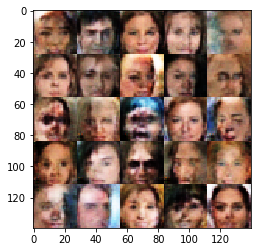

Epoch 1/1... Discriminator loss: 1.3585 Generator loss: 0.4385
Epoch 1/1... Discriminator loss: 1.0858 Generator loss: 0.7810
Epoch 1/1... Discriminator loss: 0.9858 Generator loss: 0.8302
Epoch 1/1... Discriminator loss: 0.7839 Generator loss: 1.0718
Epoch 1/1... Discriminator loss: 1.3707 Generator loss: 0.5686
Epoch 1/1... Discriminator loss: 1.1379 Generator loss: 0.5982
Epoch 1/1... Discriminator loss: 1.2972 Generator loss: 0.6181
Epoch 1/1... Discriminator loss: 1.0133 Generator loss: 0.8967
Epoch 1/1... Discriminator loss: 1.2266 Generator loss: 0.6175
Epoch 1/1... Discriminator loss: 1.0730 Generator loss: 0.7830


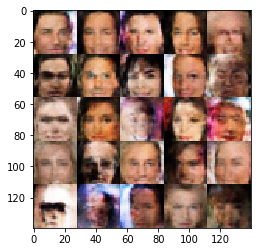

Epoch 1/1... Discriminator loss: 1.0721 Generator loss: 0.8905
Epoch 1/1... Discriminator loss: 1.3348 Generator loss: 0.5631
Epoch 1/1... Discriminator loss: 1.0573 Generator loss: 0.7980
Epoch 1/1... Discriminator loss: 1.1092 Generator loss: 0.6575
Epoch 1/1... Discriminator loss: 1.1091 Generator loss: 0.8390
Epoch 1/1... Discriminator loss: 1.3113 Generator loss: 0.6869
Epoch 1/1... Discriminator loss: 1.5888 Generator loss: 0.6498
Epoch 1/1... Discriminator loss: 1.2414 Generator loss: 0.8057
Epoch 1/1... Discriminator loss: 1.3050 Generator loss: 0.6099
Epoch 1/1... Discriminator loss: 1.5075 Generator loss: 0.6860


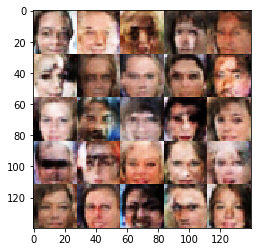

Epoch 1/1... Discriminator loss: 1.2485 Generator loss: 0.6661
Epoch 1/1... Discriminator loss: 1.1340 Generator loss: 0.7874
Epoch 1/1... Discriminator loss: 1.5057 Generator loss: 0.5218
Epoch 1/1... Discriminator loss: 0.9728 Generator loss: 0.9193
Epoch 1/1... Discriminator loss: 1.2374 Generator loss: 0.7483
Epoch 1/1... Discriminator loss: 1.0978 Generator loss: 0.7523
Epoch 1/1... Discriminator loss: 1.2194 Generator loss: 0.8118
Epoch 1/1... Discriminator loss: 1.1083 Generator loss: 0.8032
Epoch 1/1... Discriminator loss: 0.8239 Generator loss: 1.0503
Epoch 1/1... Discriminator loss: 0.8087 Generator loss: 1.0080


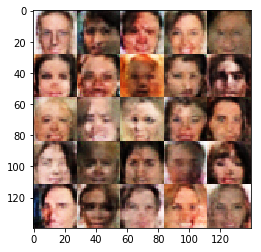

Epoch 1/1... Discriminator loss: 1.2374 Generator loss: 0.6565
Epoch 1/1... Discriminator loss: 1.0609 Generator loss: 1.0085
Epoch 1/1... Discriminator loss: 1.4161 Generator loss: 0.7333
Epoch 1/1... Discriminator loss: 1.1772 Generator loss: 0.6598
Epoch 1/1... Discriminator loss: 1.3655 Generator loss: 0.6141
Epoch 1/1... Discriminator loss: 1.1292 Generator loss: 0.8211
Epoch 1/1... Discriminator loss: 1.2595 Generator loss: 0.6629
Epoch 1/1... Discriminator loss: 1.1459 Generator loss: 0.7083
Epoch 1/1... Discriminator loss: 0.9818 Generator loss: 0.9300
Epoch 1/1... Discriminator loss: 1.5393 Generator loss: 0.6461


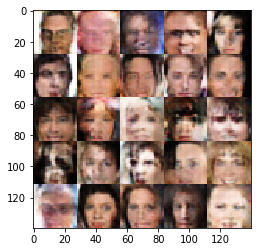

Epoch 1/1... Discriminator loss: 1.4123 Generator loss: 0.6871
Epoch 1/1... Discriminator loss: 1.1716 Generator loss: 0.7316
Epoch 1/1... Discriminator loss: 1.2081 Generator loss: 0.8264
Epoch 1/1... Discriminator loss: 1.3102 Generator loss: 0.9051
Epoch 1/1... Discriminator loss: 1.2646 Generator loss: 0.7990
Epoch 1/1... Discriminator loss: 1.4959 Generator loss: 0.7557
Epoch 1/1... Discriminator loss: 1.1703 Generator loss: 0.7491
Epoch 1/1... Discriminator loss: 1.0633 Generator loss: 0.9355
Epoch 1/1... Discriminator loss: 1.5370 Generator loss: 0.4360
Epoch 1/1... Discriminator loss: 1.1324 Generator loss: 0.7076


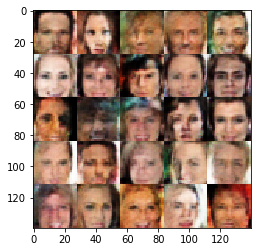

Epoch 1/1... Discriminator loss: 1.2891 Generator loss: 0.6526
Epoch 1/1... Discriminator loss: 1.2447 Generator loss: 0.7590
Epoch 1/1... Discriminator loss: 1.0080 Generator loss: 0.9125
Epoch 1/1... Discriminator loss: 1.3851 Generator loss: 0.6148
Epoch 1/1... Discriminator loss: 1.0897 Generator loss: 0.6706
Epoch 1/1... Discriminator loss: 1.2521 Generator loss: 0.7785
Epoch 1/1... Discriminator loss: 1.4744 Generator loss: 0.8837
Epoch 1/1... Discriminator loss: 1.0690 Generator loss: 0.6417
Epoch 1/1... Discriminator loss: 0.9470 Generator loss: 1.2780
Epoch 1/1... Discriminator loss: 1.0629 Generator loss: 0.8886


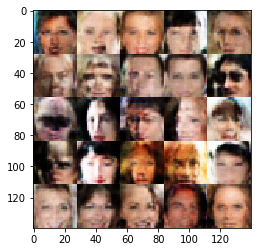

Epoch 1/1... Discriminator loss: 1.2925 Generator loss: 0.6530
Epoch 1/1... Discriminator loss: 1.1216 Generator loss: 0.9947
Epoch 1/1... Discriminator loss: 1.0428 Generator loss: 0.7740
Epoch 1/1... Discriminator loss: 1.2216 Generator loss: 0.9266
Epoch 1/1... Discriminator loss: 2.2053 Generator loss: 1.0745
Epoch 1/1... Discriminator loss: 1.3978 Generator loss: 0.6428
Epoch 1/1... Discriminator loss: 1.3760 Generator loss: 0.7029
Epoch 1/1... Discriminator loss: 1.4885 Generator loss: 0.6592
Epoch 1/1... Discriminator loss: 1.3450 Generator loss: 0.7388
Epoch 1/1... Discriminator loss: 1.4794 Generator loss: 0.8093


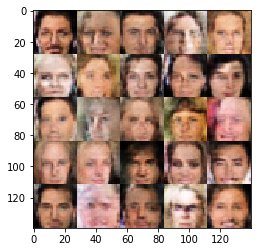

Epoch 1/1... Discriminator loss: 1.5119 Generator loss: 0.7413
Epoch 1/1... Discriminator loss: 1.3994 Generator loss: 0.6772
Epoch 1/1... Discriminator loss: 1.1577 Generator loss: 0.9193
Epoch 1/1... Discriminator loss: 1.1514 Generator loss: 0.6621
Epoch 1/1... Discriminator loss: 1.2803 Generator loss: 0.6412
Epoch 1/1... Discriminator loss: 1.2855 Generator loss: 0.7429
Epoch 1/1... Discriminator loss: 1.2397 Generator loss: 0.6798
Epoch 1/1... Discriminator loss: 1.3764 Generator loss: 0.7048
Epoch 1/1... Discriminator loss: 1.2357 Generator loss: 0.6967
Epoch 1/1... Discriminator loss: 1.5489 Generator loss: 0.6430


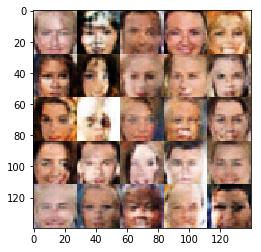

Epoch 1/1... Discriminator loss: 1.4610 Generator loss: 0.5938
Epoch 1/1... Discriminator loss: 1.0703 Generator loss: 0.7746
Epoch 1/1... Discriminator loss: 1.3431 Generator loss: 0.6888
Epoch 1/1... Discriminator loss: 1.0181 Generator loss: 0.7854
Epoch 1/1... Discriminator loss: 1.2945 Generator loss: 0.6975
Epoch 1/1... Discriminator loss: 1.6367 Generator loss: 0.4156
Epoch 1/1... Discriminator loss: 1.3484 Generator loss: 0.6576
Epoch 1/1... Discriminator loss: 1.2070 Generator loss: 0.8291
Epoch 1/1... Discriminator loss: 1.1814 Generator loss: 0.8103
Epoch 1/1... Discriminator loss: 1.2131 Generator loss: 0.7447


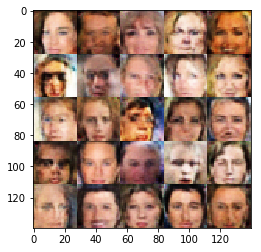

Epoch 1/1... Discriminator loss: 1.3852 Generator loss: 1.4258
Epoch 1/1... Discriminator loss: 1.3132 Generator loss: 0.6869
Epoch 1/1... Discriminator loss: 1.2511 Generator loss: 0.7869
Epoch 1/1... Discriminator loss: 1.2376 Generator loss: 0.8758
Epoch 1/1... Discriminator loss: 0.8909 Generator loss: 1.6058
Epoch 1/1... Discriminator loss: 1.3267 Generator loss: 0.7283
Epoch 1/1... Discriminator loss: 1.2432 Generator loss: 0.7979
Epoch 1/1... Discriminator loss: 1.4452 Generator loss: 0.8191
Epoch 1/1... Discriminator loss: 1.3190 Generator loss: 0.7910
Epoch 1/1... Discriminator loss: 1.4927 Generator loss: 0.6454


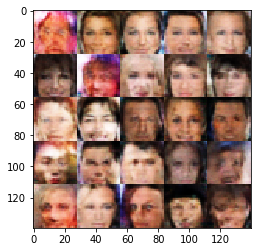

Epoch 1/1... Discriminator loss: 1.2860 Generator loss: 0.7352
Epoch 1/1... Discriminator loss: 1.2971 Generator loss: 0.7642
Epoch 1/1... Discriminator loss: 1.3096 Generator loss: 0.7401
Epoch 1/1... Discriminator loss: 1.4798 Generator loss: 0.8330
Epoch 1/1... Discriminator loss: 1.4940 Generator loss: 0.6650
Epoch 1/1... Discriminator loss: 1.6392 Generator loss: 0.7362
Epoch 1/1... Discriminator loss: 1.2161 Generator loss: 0.7380
Epoch 1/1... Discriminator loss: 1.2756 Generator loss: 0.6872
Epoch 1/1... Discriminator loss: 1.5729 Generator loss: 0.5572
Epoch 1/1... Discriminator loss: 1.3917 Generator loss: 0.7532


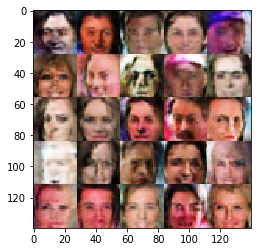

Epoch 1/1... Discriminator loss: 1.0960 Generator loss: 0.8338
Epoch 1/1... Discriminator loss: 1.6006 Generator loss: 0.4729
Epoch 1/1... Discriminator loss: 1.6265 Generator loss: 0.5892
Epoch 1/1... Discriminator loss: 1.3994 Generator loss: 0.8646
Epoch 1/1... Discriminator loss: 1.3928 Generator loss: 0.6076
Epoch 1/1... Discriminator loss: 1.0086 Generator loss: 0.7699
Epoch 1/1... Discriminator loss: 1.2695 Generator loss: 0.7237
Epoch 1/1... Discriminator loss: 1.3396 Generator loss: 0.7772
Epoch 1/1... Discriminator loss: 1.2739 Generator loss: 0.8880
Epoch 1/1... Discriminator loss: 1.3362 Generator loss: 0.6789


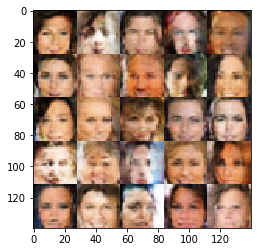

Epoch 1/1... Discriminator loss: 1.3451 Generator loss: 0.7360
Epoch 1/1... Discriminator loss: 1.2426 Generator loss: 0.9805
Epoch 1/1... Discriminator loss: 1.6140 Generator loss: 0.6580
Epoch 1/1... Discriminator loss: 1.5142 Generator loss: 0.5895
Epoch 1/1... Discriminator loss: 1.6599 Generator loss: 0.6075
Epoch 1/1... Discriminator loss: 1.4741 Generator loss: 0.7975
Epoch 1/1... Discriminator loss: 1.3793 Generator loss: 0.7090
Epoch 1/1... Discriminator loss: 1.3202 Generator loss: 0.7780
Epoch 1/1... Discriminator loss: 1.4717 Generator loss: 0.5807
Epoch 1/1... Discriminator loss: 1.5380 Generator loss: 0.7111


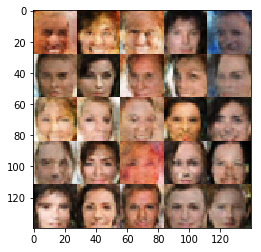

Epoch 1/1... Discriminator loss: 1.2840 Generator loss: 0.8486
Epoch 1/1... Discriminator loss: 1.4135 Generator loss: 0.7039
Epoch 1/1... Discriminator loss: 1.4415 Generator loss: 0.7412
Epoch 1/1... Discriminator loss: 1.3183 Generator loss: 0.8135
Epoch 1/1... Discriminator loss: 1.3933 Generator loss: 0.7736
Epoch 1/1... Discriminator loss: 1.3028 Generator loss: 0.7739
Epoch 1/1... Discriminator loss: 1.4887 Generator loss: 0.5758
Epoch 1/1... Discriminator loss: 1.3288 Generator loss: 0.8136
Epoch 1/1... Discriminator loss: 1.5526 Generator loss: 0.6414
Epoch 1/1... Discriminator loss: 1.6899 Generator loss: 0.5058


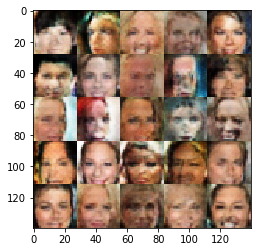

Epoch 1/1... Discriminator loss: 1.3471 Generator loss: 0.6965
Epoch 1/1... Discriminator loss: 1.6110 Generator loss: 0.7509
Epoch 1/1... Discriminator loss: 1.4888 Generator loss: 0.5202
Epoch 1/1... Discriminator loss: 1.5657 Generator loss: 0.8624
Epoch 1/1... Discriminator loss: 1.5006 Generator loss: 0.6042
Epoch 1/1... Discriminator loss: 1.2763 Generator loss: 0.7109
Epoch 1/1... Discriminator loss: 1.3502 Generator loss: 0.7304
Epoch 1/1... Discriminator loss: 1.4563 Generator loss: 0.6548
Epoch 1/1... Discriminator loss: 1.5319 Generator loss: 0.5755
Epoch 1/1... Discriminator loss: 1.5285 Generator loss: 0.6260


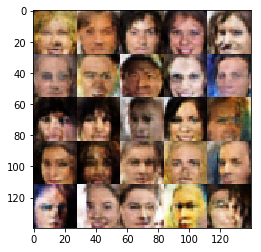

Epoch 1/1... Discriminator loss: 1.5257 Generator loss: 0.5593
Epoch 1/1... Discriminator loss: 1.4247 Generator loss: 0.7262
Epoch 1/1... Discriminator loss: 1.4689 Generator loss: 0.6532
Epoch 1/1... Discriminator loss: 1.5787 Generator loss: 0.8766
Epoch 1/1... Discriminator loss: 1.5670 Generator loss: 0.6320
Epoch 1/1... Discriminator loss: 1.5629 Generator loss: 0.7022
Epoch 1/1... Discriminator loss: 1.4192 Generator loss: 0.7545
Epoch 1/1... Discriminator loss: 1.7383 Generator loss: 0.7334
Epoch 1/1... Discriminator loss: 1.3744 Generator loss: 0.8124
Epoch 1/1... Discriminator loss: 1.7994 Generator loss: 0.7519


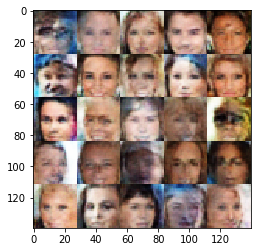

Epoch 1/1... Discriminator loss: 1.5643 Generator loss: 0.7232
Epoch 1/1... Discriminator loss: 1.6372 Generator loss: 0.6290
Epoch 1/1... Discriminator loss: 1.5204 Generator loss: 0.7914
Epoch 1/1... Discriminator loss: 1.3923 Generator loss: 0.7659
Epoch 1/1... Discriminator loss: 1.3533 Generator loss: 0.8295
Epoch 1/1... Discriminator loss: 1.3321 Generator loss: 0.9303
Epoch 1/1... Discriminator loss: 1.6619 Generator loss: 0.7425
Epoch 1/1... Discriminator loss: 1.3392 Generator loss: 0.7320
Epoch 1/1... Discriminator loss: 1.6132 Generator loss: 0.6157
Epoch 1/1... Discriminator loss: 1.5335 Generator loss: 0.6699


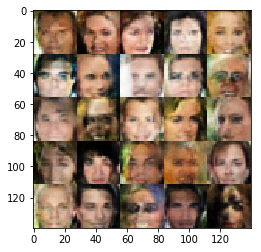

Epoch 1/1... Discriminator loss: 1.4949 Generator loss: 0.5984
Epoch 1/1... Discriminator loss: 1.2398 Generator loss: 0.7424
Epoch 1/1... Discriminator loss: 1.3031 Generator loss: 0.7805
Epoch 1/1... Discriminator loss: 1.2565 Generator loss: 0.7847
Epoch 1/1... Discriminator loss: 1.2943 Generator loss: 0.8015
Epoch 1/1... Discriminator loss: 1.1480 Generator loss: 0.9312
Epoch 1/1... Discriminator loss: 1.4535 Generator loss: 0.6590
Epoch 1/1... Discriminator loss: 1.5479 Generator loss: 0.6680
Epoch 1/1... Discriminator loss: 1.1882 Generator loss: 0.8068
Epoch 1/1... Discriminator loss: 1.8747 Generator loss: 0.6069


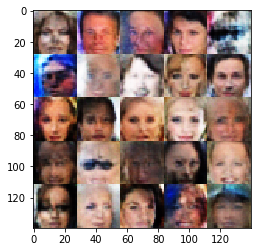

Epoch 1/1... Discriminator loss: 1.5900 Generator loss: 0.7818
Epoch 1/1... Discriminator loss: 1.5406 Generator loss: 0.6517
Epoch 1/1... Discriminator loss: 1.7772 Generator loss: 0.5989
Epoch 1/1... Discriminator loss: 1.2692 Generator loss: 0.8385
Epoch 1/1... Discriminator loss: 1.5887 Generator loss: 0.6791
Epoch 1/1... Discriminator loss: 1.6796 Generator loss: 0.6941
Epoch 1/1... Discriminator loss: 1.4386 Generator loss: 0.7784
Epoch 1/1... Discriminator loss: 1.4983 Generator loss: 0.6755
Epoch 1/1... Discriminator loss: 1.3975 Generator loss: 0.8107
Epoch 1/1... Discriminator loss: 1.4158 Generator loss: 0.7470


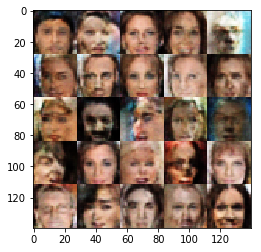

Epoch 1/1... Discriminator loss: 1.4966 Generator loss: 0.6349
Epoch 1/1... Discriminator loss: 1.4422 Generator loss: 0.6544
Epoch 1/1... Discriminator loss: 1.4240 Generator loss: 0.7044


In [16]:
batch_size = 32
z_dim = 100
global_step = tf.Variable(0, trainable=False)
d_learning_rate = tf.train.exponential_decay(0.0005, global_step, 100, 0.96, staircase=True)
g_learning_rate = tf.train.exponential_decay(0.002, global_step, 100, 0.96, staircase=True)
learning_rate = (d_learning_rate, g_learning_rate)
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.